# 1. Project description

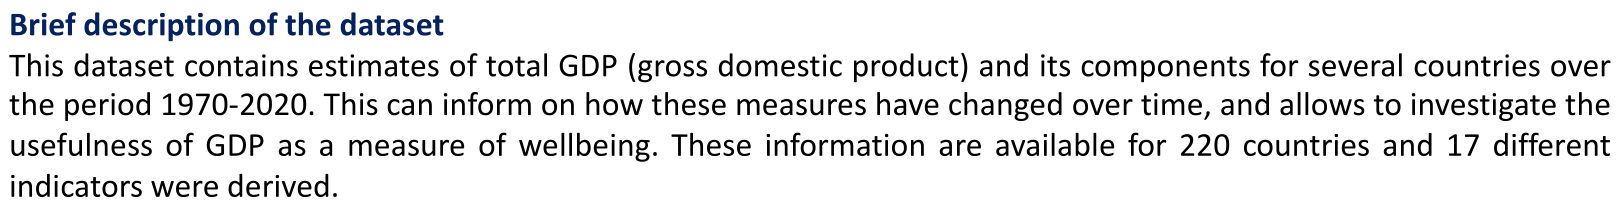

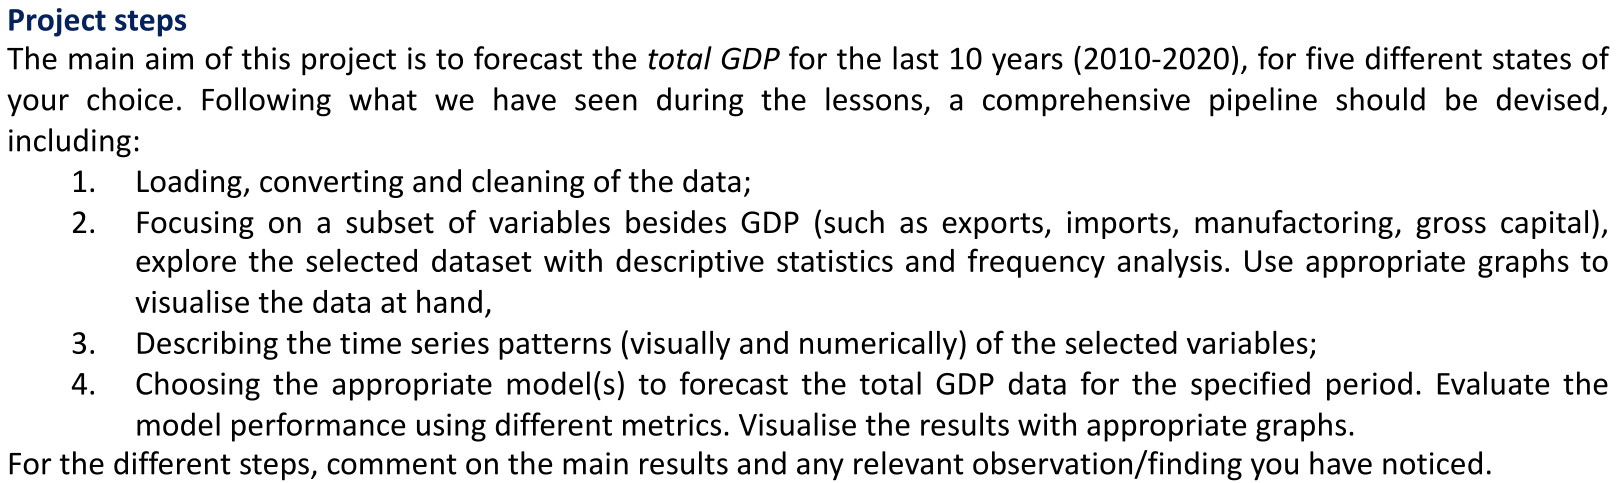

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy.fft import fft
from statsmodels.tsa.seasonal import seasonal_decompose
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df_iniziale = pd.read_csv('GDPconstant-USD-countries.csv', index_col = 'CountryID')

df, valid_nations = f.preprocess_df(df_iniziale)

In [3]:
df.head(3)

,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryID,,,,,,,,,,,,,,,,,,,,,
8,Albania,Final consumption expenditure,2.035896e+09,2.117670e+09,2.202717e+09,2.290083e+09,2.383229e+09,2.478907e+09,2.573526e+09,2.686010e+09,...,9.829417e+09,9.841766e+09,1.003528e+10,1.036170e+10,1.045381e+10,1.070931e+10,1.098068e+10,1.129870e+10,1.165178e+10,1.142641e+10
8,Albania,Household consumption expenditure (including N...,1.952117e+09,2.030508e+09,2.112067e+09,2.195867e+09,2.285082e+09,2.376931e+09,2.467748e+09,2.575058e+09,...,8.662830e+09,8.673986e+09,8.833231e+09,9.081697e+09,9.188655e+09,9.383914e+09,9.613148e+09,9.922240e+09,1.023528e+10,1.002502e+10
8,Albania,General government final consumption expenditure,8.830853e+07,9.187170e+07,9.554977e+07,9.931108e+07,1.034472e+08,1.074913e+08,1.115066e+08,1.169159e+08,...,1.167228e+09,1.168429e+09,1.202395e+09,1.279283e+09,1.265160e+09,1.324583e+09,1.366461e+09,1.376212e+09,1.416324e+09,1.400874e+09


In [4]:
nation_list = f.create_nation_list(valid_nations, df)
nation_list

['Finland', 'Sweden', 'Portugal', 'Algeria', 'Germany']

Default target countries = Finland, Sweden, Portugal, Algeria, Germany

Default target variables = Import, Export, Manufacturing, Gross Capital

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 8 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1921 non-null   object 
 1   IndicatorName  1921 non-null   object 
 2   1970           1921 non-null   float64
 3   1971           1921 non-null   float64
 4   1972           1921 non-null   float64
 5   1973           1921 non-null   float64
 6   1974           1921 non-null   float64
 7   1975           1921 non-null   float64
 8   1976           1921 non-null   float64
 9   1977           1921 non-null   float64
 10  1978           1921 non-null   float64
 11  1979           1921 non-null   float64
 12  1980           1921 non-null   float64
 13  1981           1921 non-null   float64
 14  1982           1921 non-null   float64
 15  1983           1921 non-null   float64
 16  1984           1921 non-null   float64
 17  1985           1921 non-null   float64
 18  1986          

In [6]:
df_1 = df[df['Country'] == nation_list[0]]
df_1 = f.create_df(df_1)
df_2 = df[df['Country'] == nation_list[1]]
df_2 = f.create_df(df_2)
df_3 = df[df['Country'] == nation_list[2]]
df_3 = f.create_df(df_3)
df_4 = df[df['Country'] == nation_list[3]]
df_4 = f.create_df(df_4)
df_5 = df[df['Country'] == nation_list[4]]
df_5 = f.create_df(df_5)

df_list = [df_1, df_2, df_3, df_4, df_5]

In [ ]:
for idx, df in enumerate(df_list):
    print(nation_list[idx])
    print(df.info())
    print('----------------------------------------------')

Finland
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None
----------------------------------------------
Sweden
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
mem

Change from object type to float type

In [8]:
df_1 = df_1.astype(float)
df_2 = df_2.astype(float)
df_3 = df_3.astype(float)
df_4 = df_4.astype(float)
df_5 = df_5.astype(float)

# 4. Descriptive statistics

In [9]:
for df in df_list:
    display(df.describe())

,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.000000e+01,5.100000e+01
top,1.066242e+10,1.400966e+10,8.941799e+09,3.074888e+10,7.886801e+10
freq,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,2.866925e+10,3.890673e+10,2.446539e+10,5.782988e+10,1.961502e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.000000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,8.332350e+09,9.110343e+09,8.717461e+09,1.500860e+10,6.645447e+10
freq,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.000000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,4.322627e+10,9.276188e+09,1.414257e+09,1.283881e+10,3.485847e+10
freq,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,1.533990e+11,1.618174e+11,3.625062e+11,4.146930e+11,1.398222e+12
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Check for the variable with the highest correlation with GDP

In [10]:
corr_1 = df_1.corr()
corr_2 = df_2.corr()
corr_3 = df_3.corr()
corr_4 = df_4.corr()
corr_5 = df_5.corr()

corr_list = [corr_1, corr_2, corr_3, corr_4, corr_5]

max_list = []
f.highest_corr_variable(corr_list, max_list, nation_list)

,Highest correlation variable
Finland,Exports
Sweden,Imports
Portugal,Manufacturing
Algeria,Manufacturing
Germany,Manufacturing


# 5. Descriptive plots

## 5.1 Line-plot 

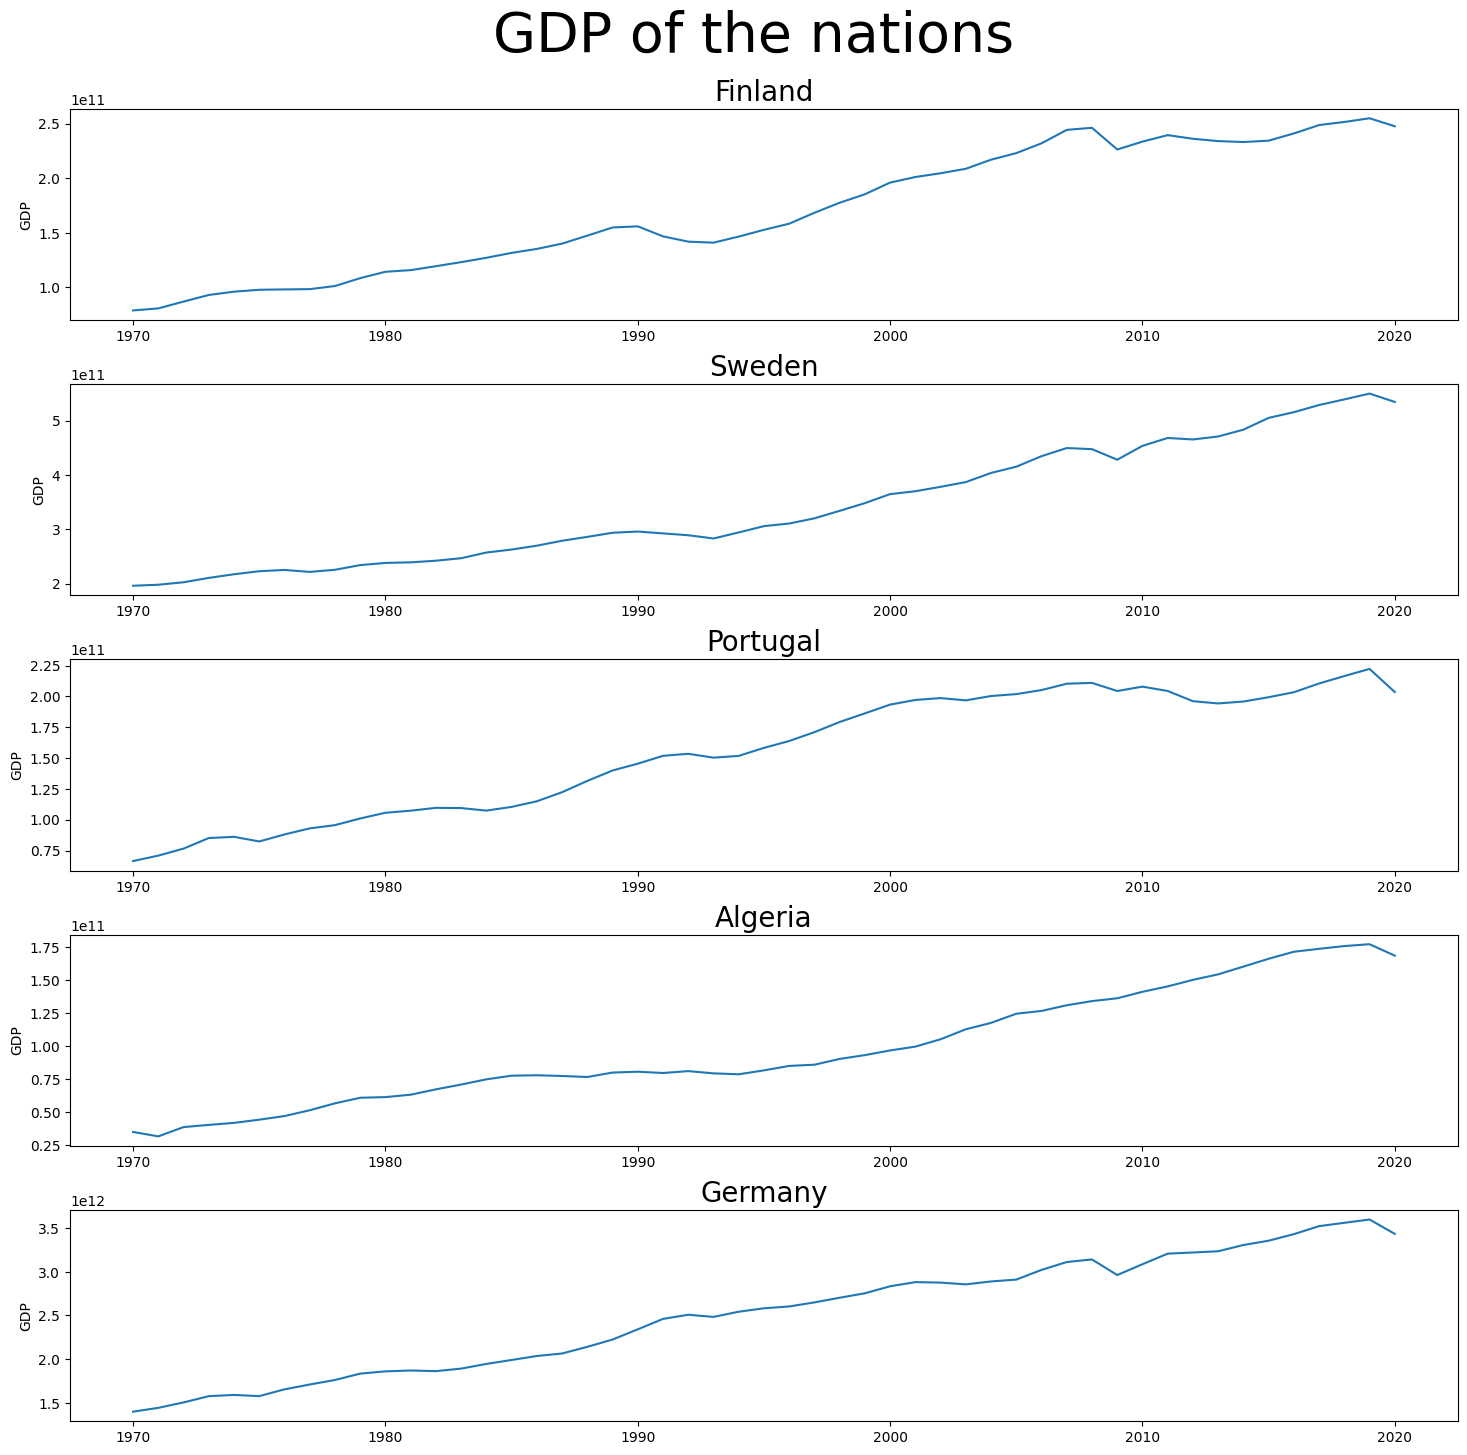

In [11]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

for idx, df in enumerate(df_list):
    sns.lineplot(df['GDP'], ax = ax[idx])
    ax[idx].set_title(nation_list[idx], fontsize = 20)

plt.show()

GDP has similar trend for all the states

## 5.2 Correlation heatmap

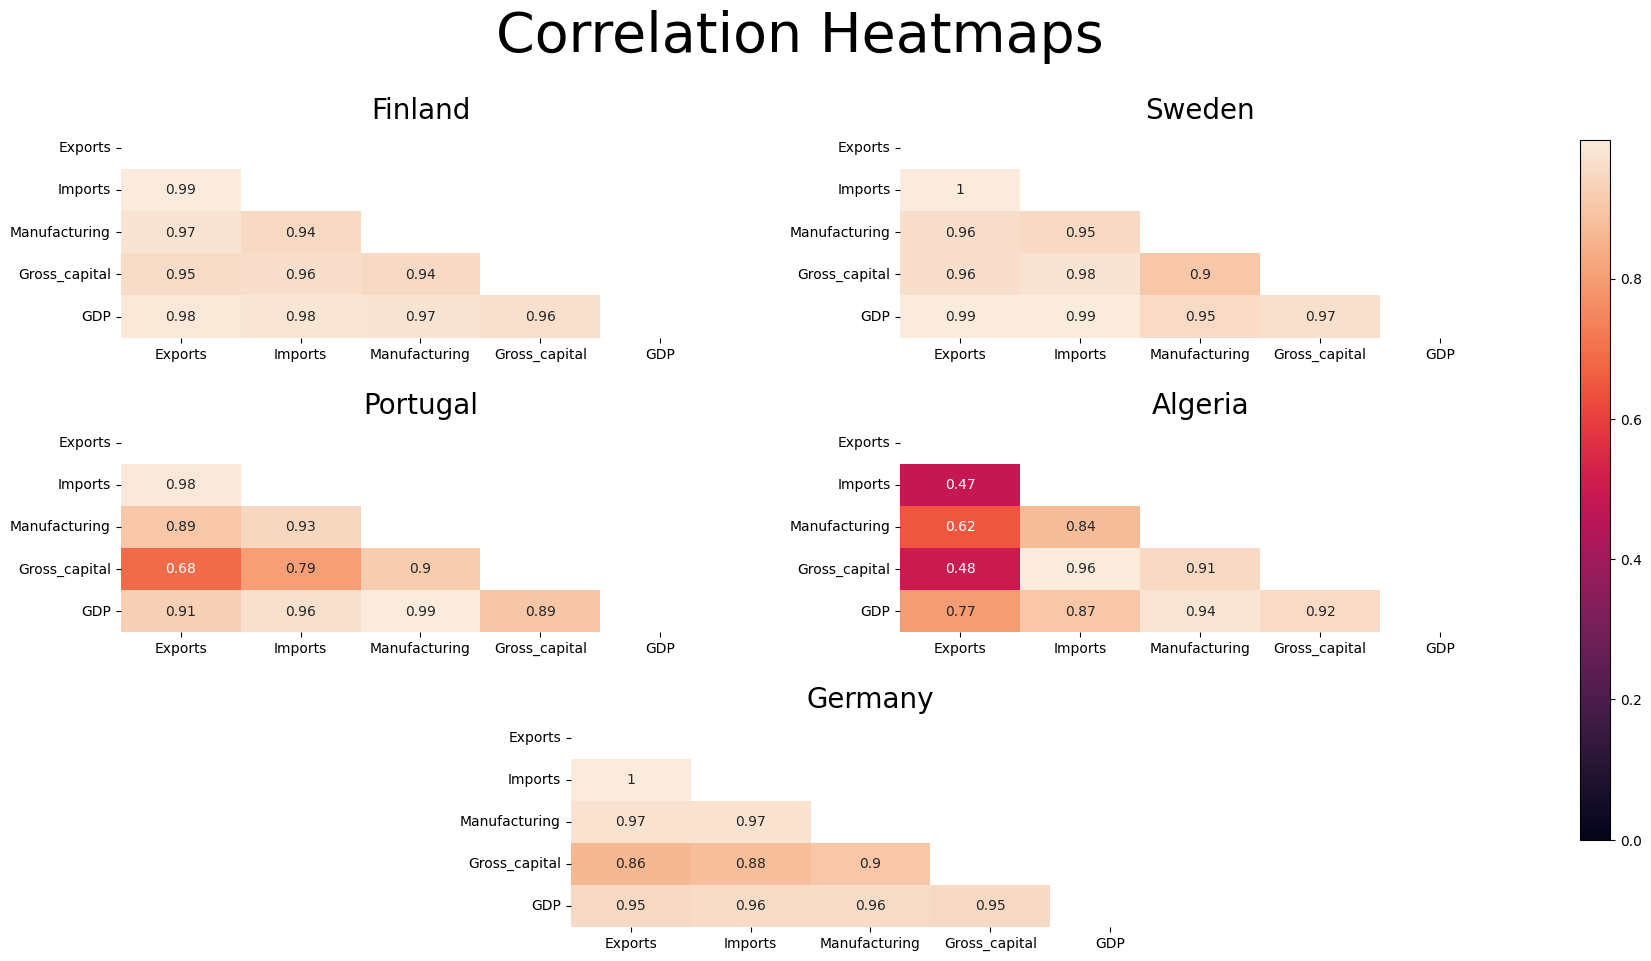

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_1)
sns.heatmap(corr_1,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_3)
sns.heatmap(corr_3, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_4)
sns.heatmap(corr_4, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_5)
sns.heatmap(corr_5, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## 5.3 Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


,0,1
Finland,Manufacturing,Gross_capital
Sweden,Manufacturing,Gross_capital
Portugal,Exports,Gross_capital
Algeria,Exports,Imports
Germany,Exports,Gross_capital


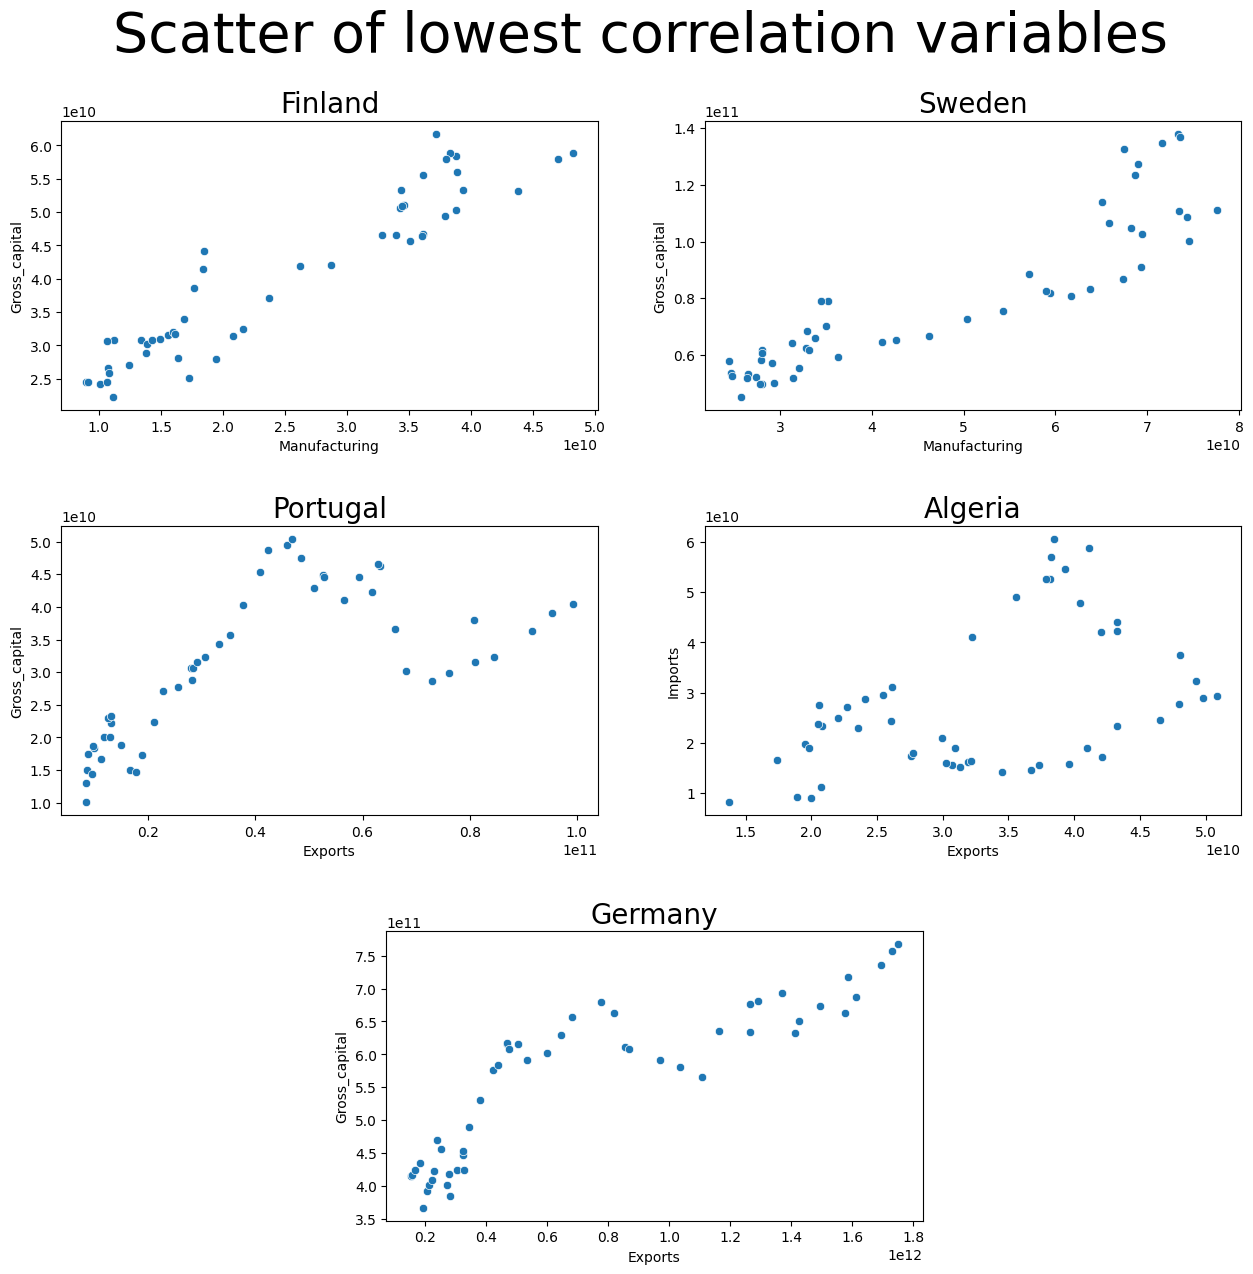

In [13]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_1)
low_corr_list.append(idx)
sns.scatterplot(x = df_1[idx[0]], y = df_1[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_2)
low_corr_list.append(idx)
sns.scatterplot(x = df_2[idx[0]], y = df_2[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_3)
low_corr_list.append(idx)
sns.scatterplot(x = df_3[idx[0]], y = df_3[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_4)
low_corr_list.append(idx)
sns.scatterplot(x = df_4[idx[0]], y = df_4[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_5)
low_corr_list.append(idx)
sns.scatterplot(x = df_5[idx[0]], y = df_5[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = nation_list))

plt.show()

## 5.4 Lag-plot

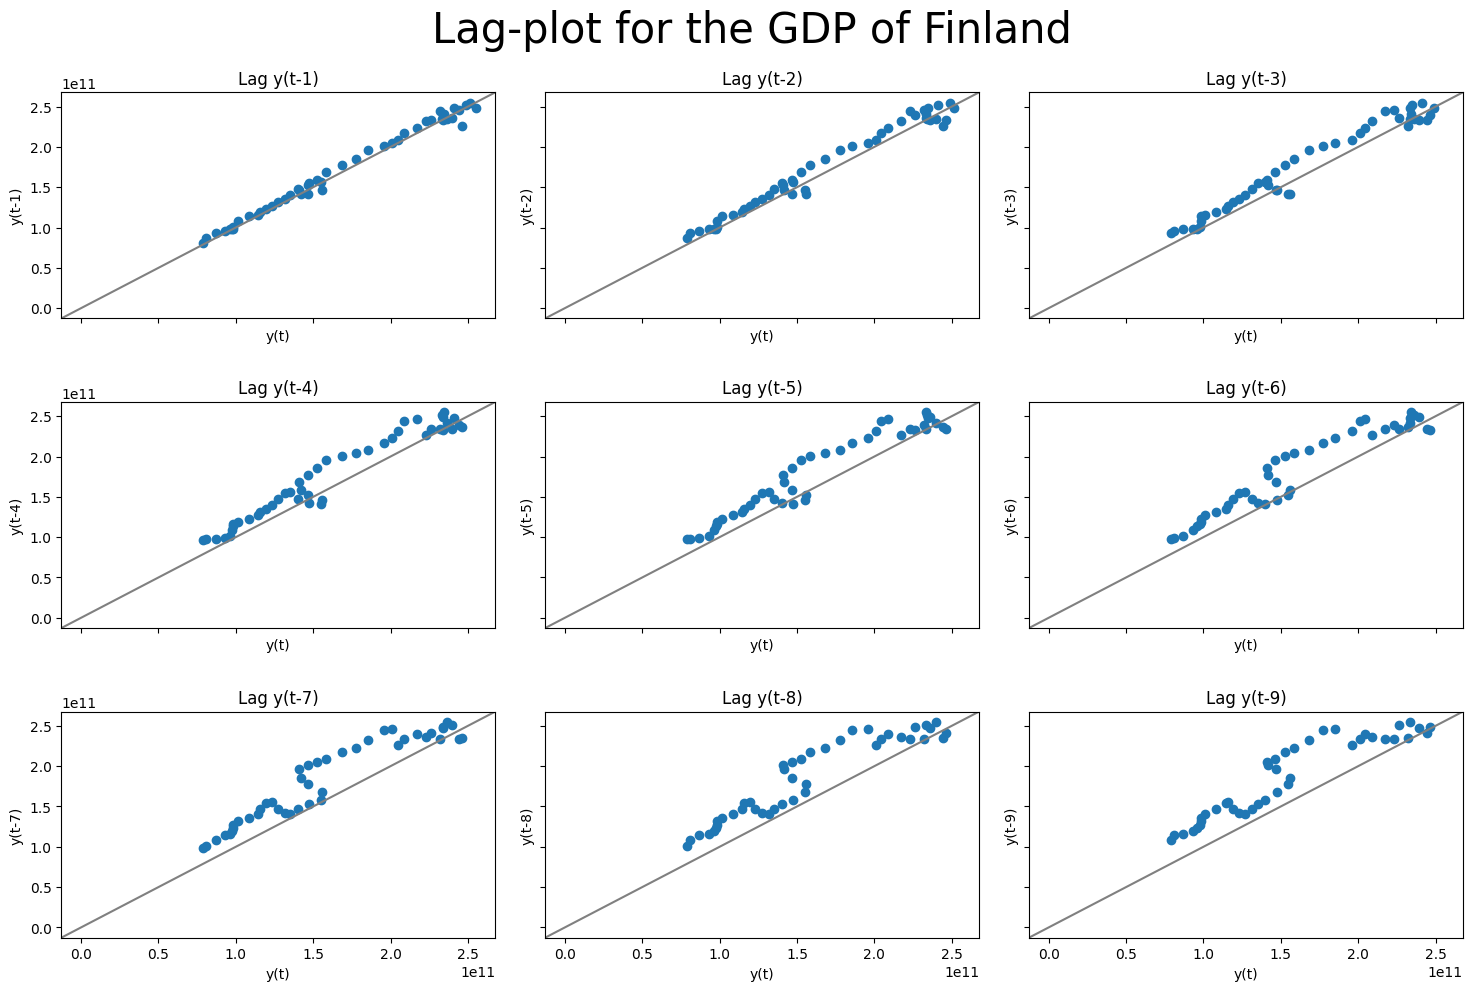

In [14]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle(f'Lag-plot for the GDP of {nation_list[0]}', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_1['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## 5.5 ACF and PACF of GDP

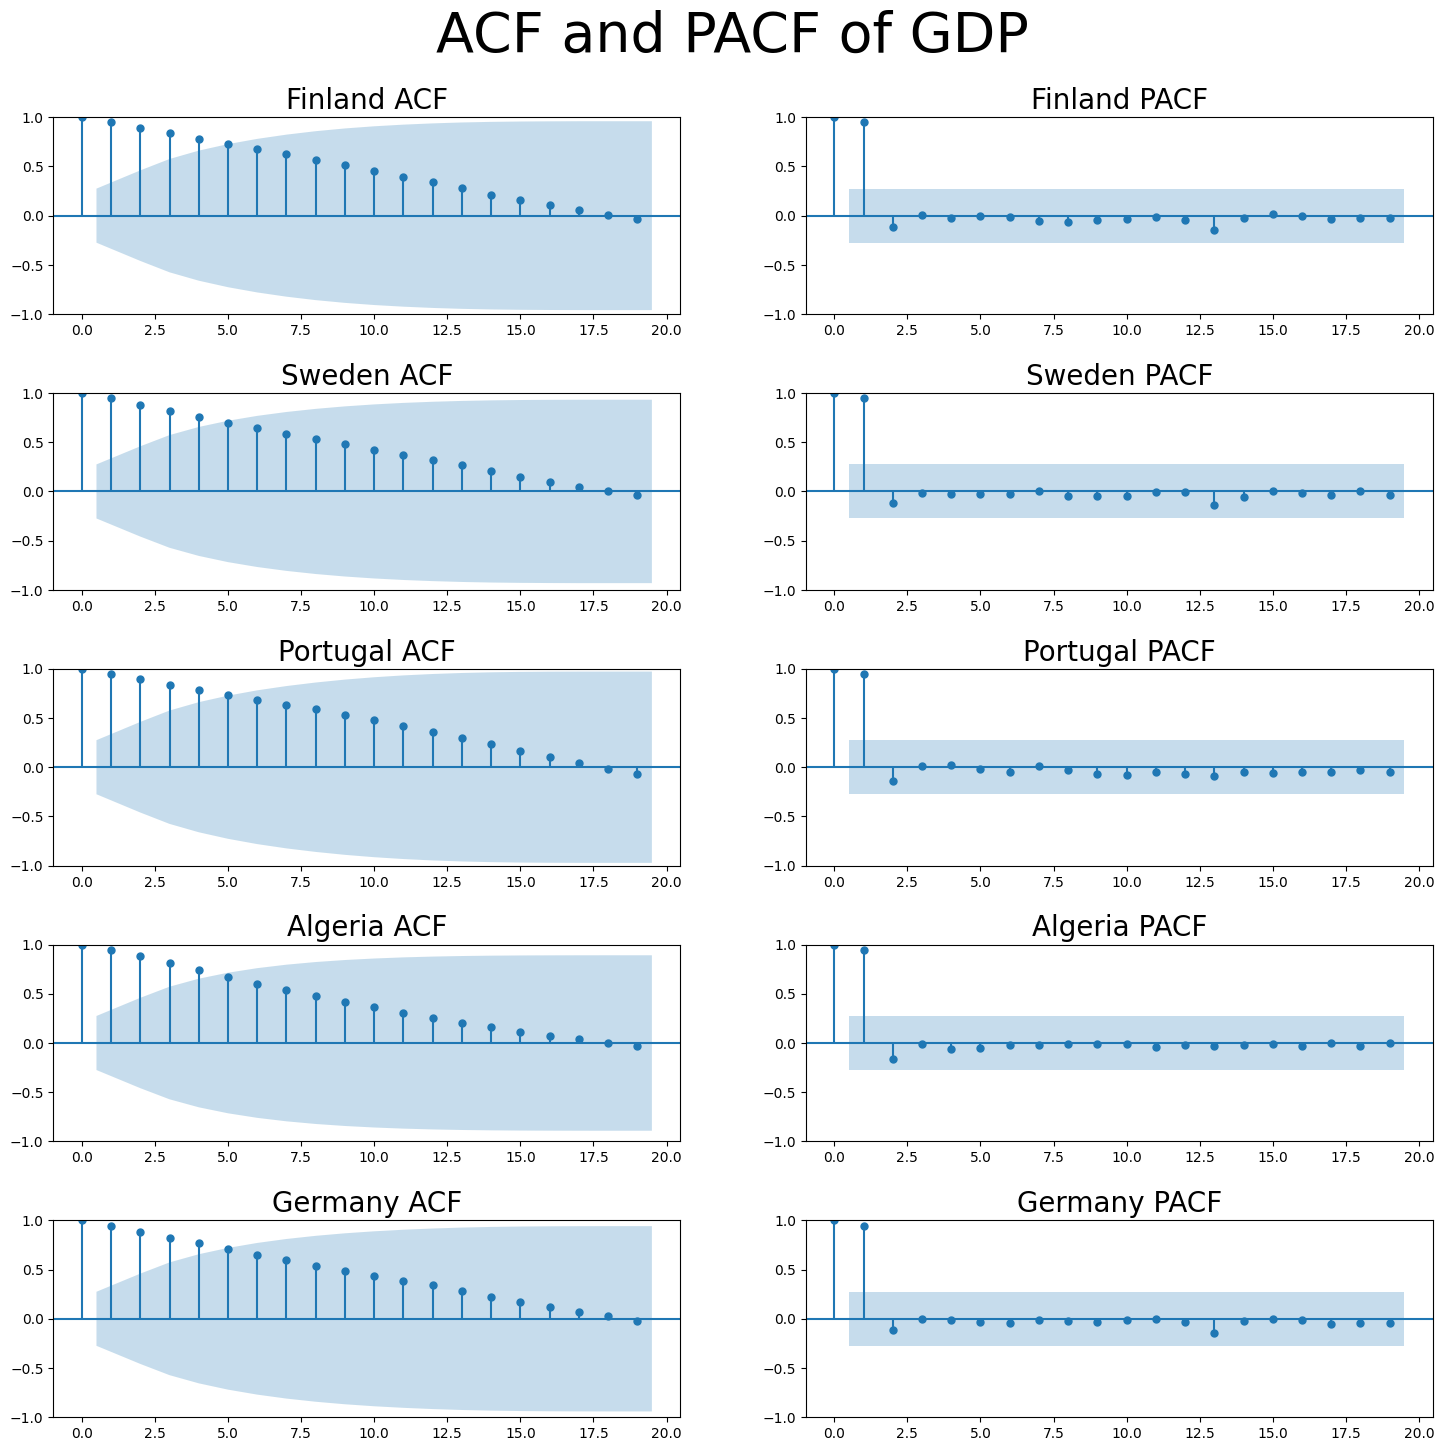

In [15]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df['GDP'], lags = 19, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df['GDP'], lags = 19, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 6. Split data in train and test 

In [16]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

# 7. Frequency analysis

## 7.1 Fast Fourier Transform

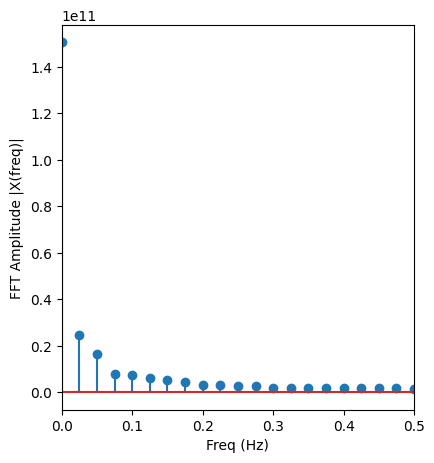

In [17]:
X = fft(df_train_test[nation_list[0]][0]['GDP'])
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## 7.2 Power-spectral density

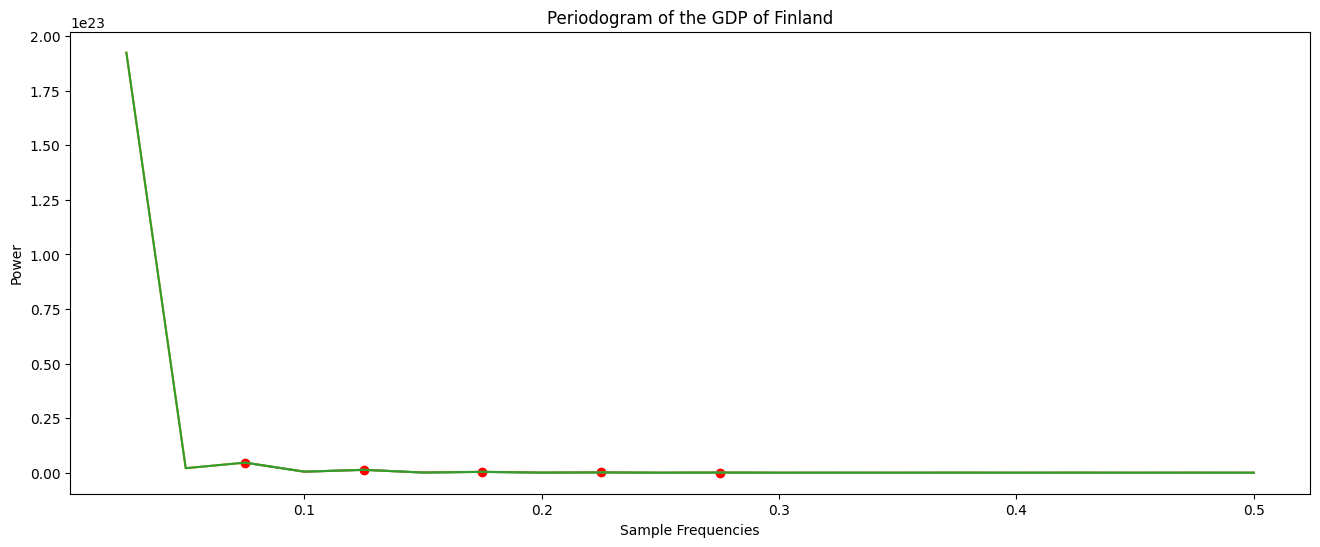

,Frequency,Density,Period
0,0.075,4.616394e+21,13.333333
1,0.125,1.323946e+21,8.000000
2,0.175,3.951268e+20,5.714286
3,0.225,1.510196e+20,4.444444
4,0.275,8.303045e+19,3.636364


----------------------------------------------


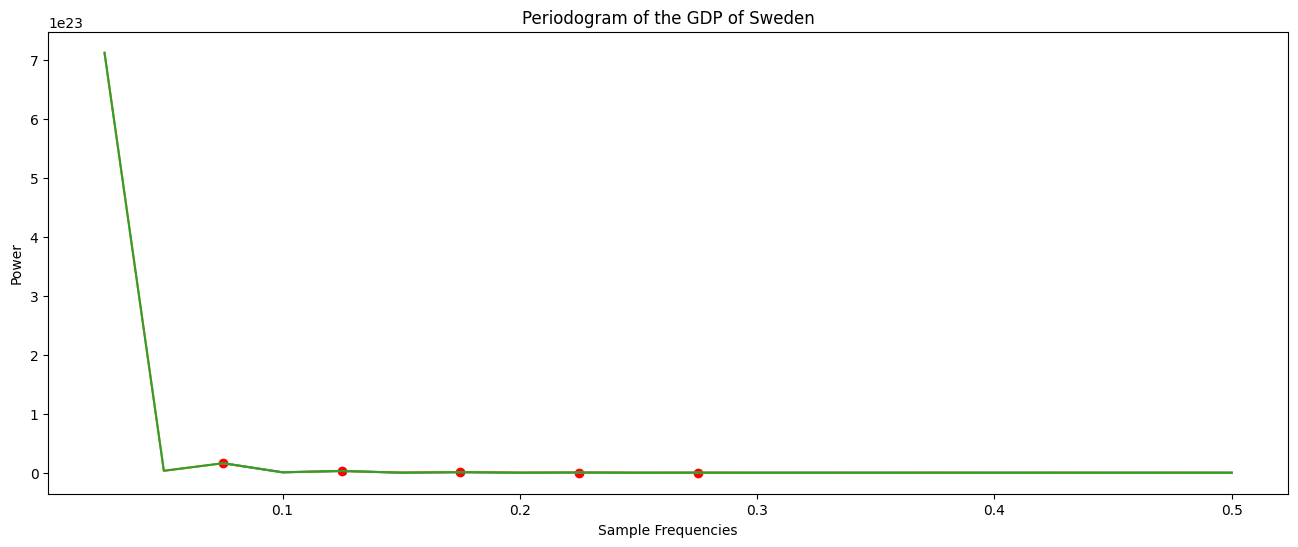

,Frequency,Density,Period
0,0.075,1.611147e+22,13.333333
1,0.125,2.950124e+21,8.000000
2,0.175,9.493779e+20,5.714286
3,0.225,3.601053e+20,4.444444
4,0.275,1.238282e+20,3.636364


----------------------------------------------


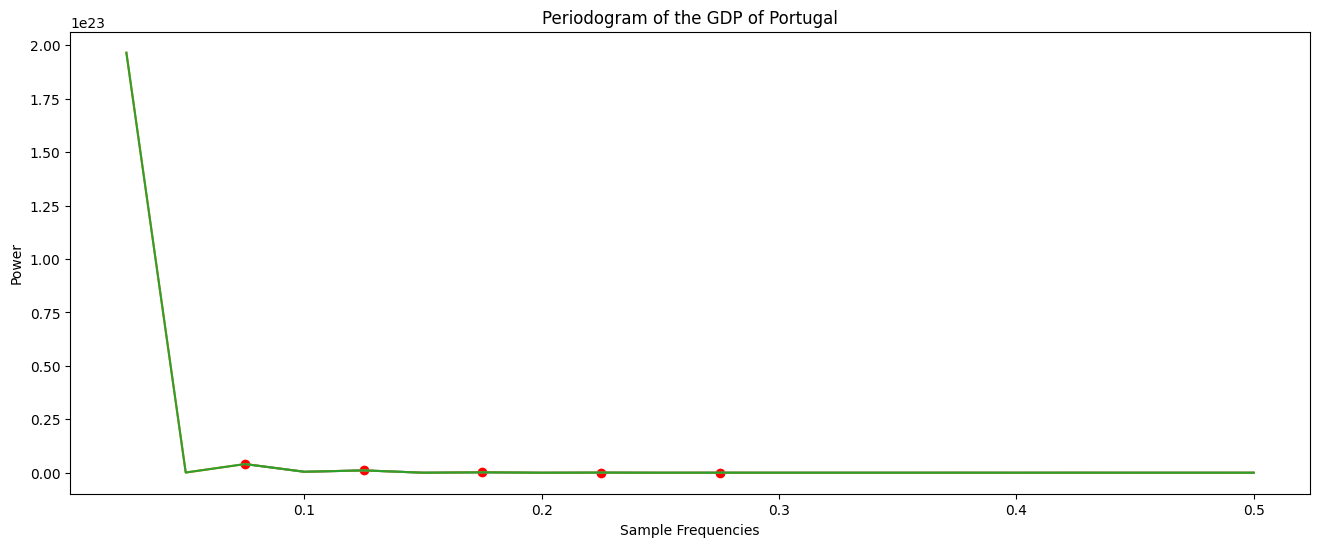

,Frequency,Density,Period
0,0.075,4.052807e+21,13.333333
1,0.125,1.089262e+21,8.000000
2,0.175,1.849057e+20,5.714286
3,0.225,6.367428e+19,4.444444
4,0.275,1.857446e+19,3.636364


----------------------------------------------


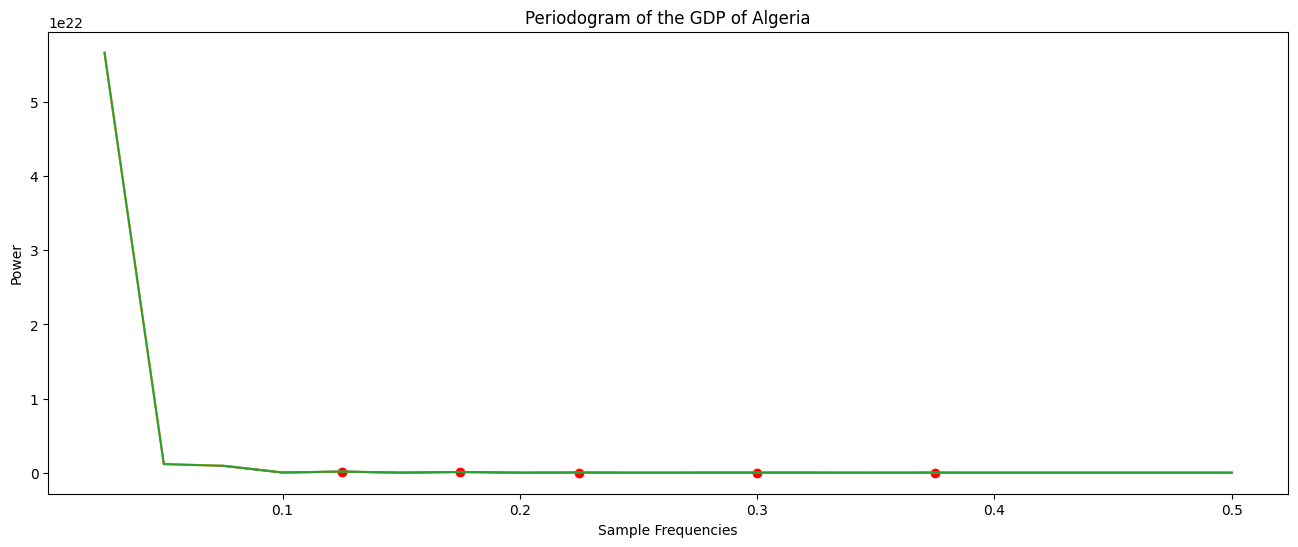

,Frequency,Density,Period
0,0.125,1.555459e+20,8.000000
1,0.175,9.987653e+19,5.714286
2,0.225,2.663023e+19,4.444444
3,0.300,1.271929e+19,3.333333
4,0.375,1.233406e+19,2.666667


----------------------------------------------


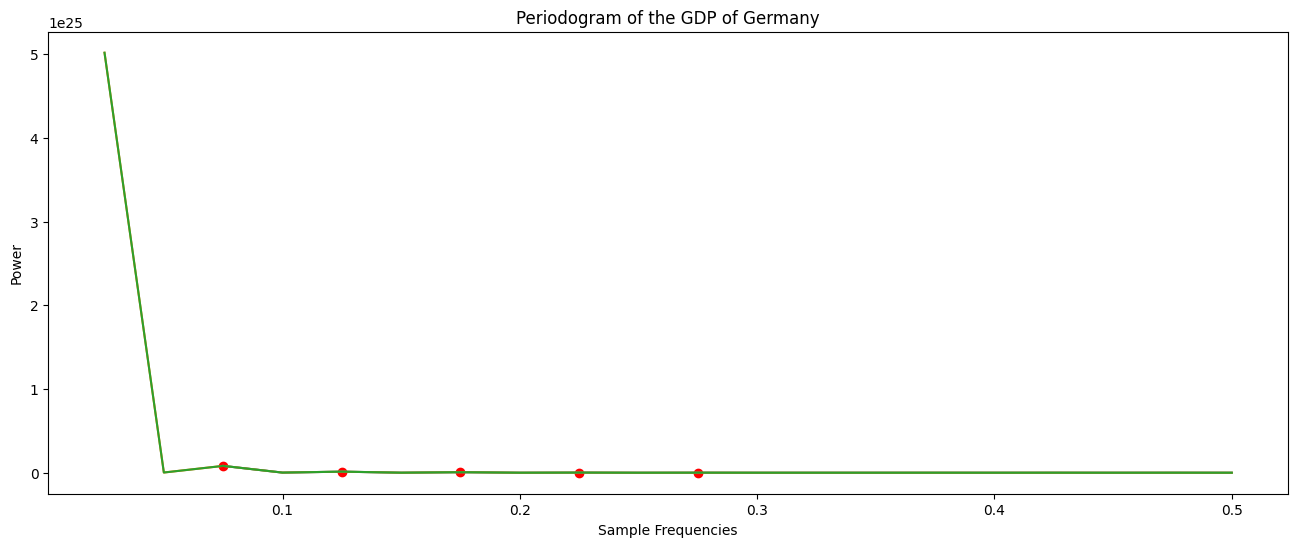

,Frequency,Density,Period
0,0.075,8.167657e+23,13.333333
1,0.125,1.284873e+23,8.000000
2,0.175,6.251032e+22,5.714286
3,0.225,1.675840e+22,4.444444
4,0.275,6.289421e+21,3.636364


----------------------------------------------


In [18]:
seasons_list = []

for nation in nation_list:
    top_season = f.spd(nation, df_train_test, Fs)
    seasons_list.append(top_season)
    print('----------------------------------------------')

seasons_list = [round(x) for x in seasons_list]

# 8. Seasonal decompose

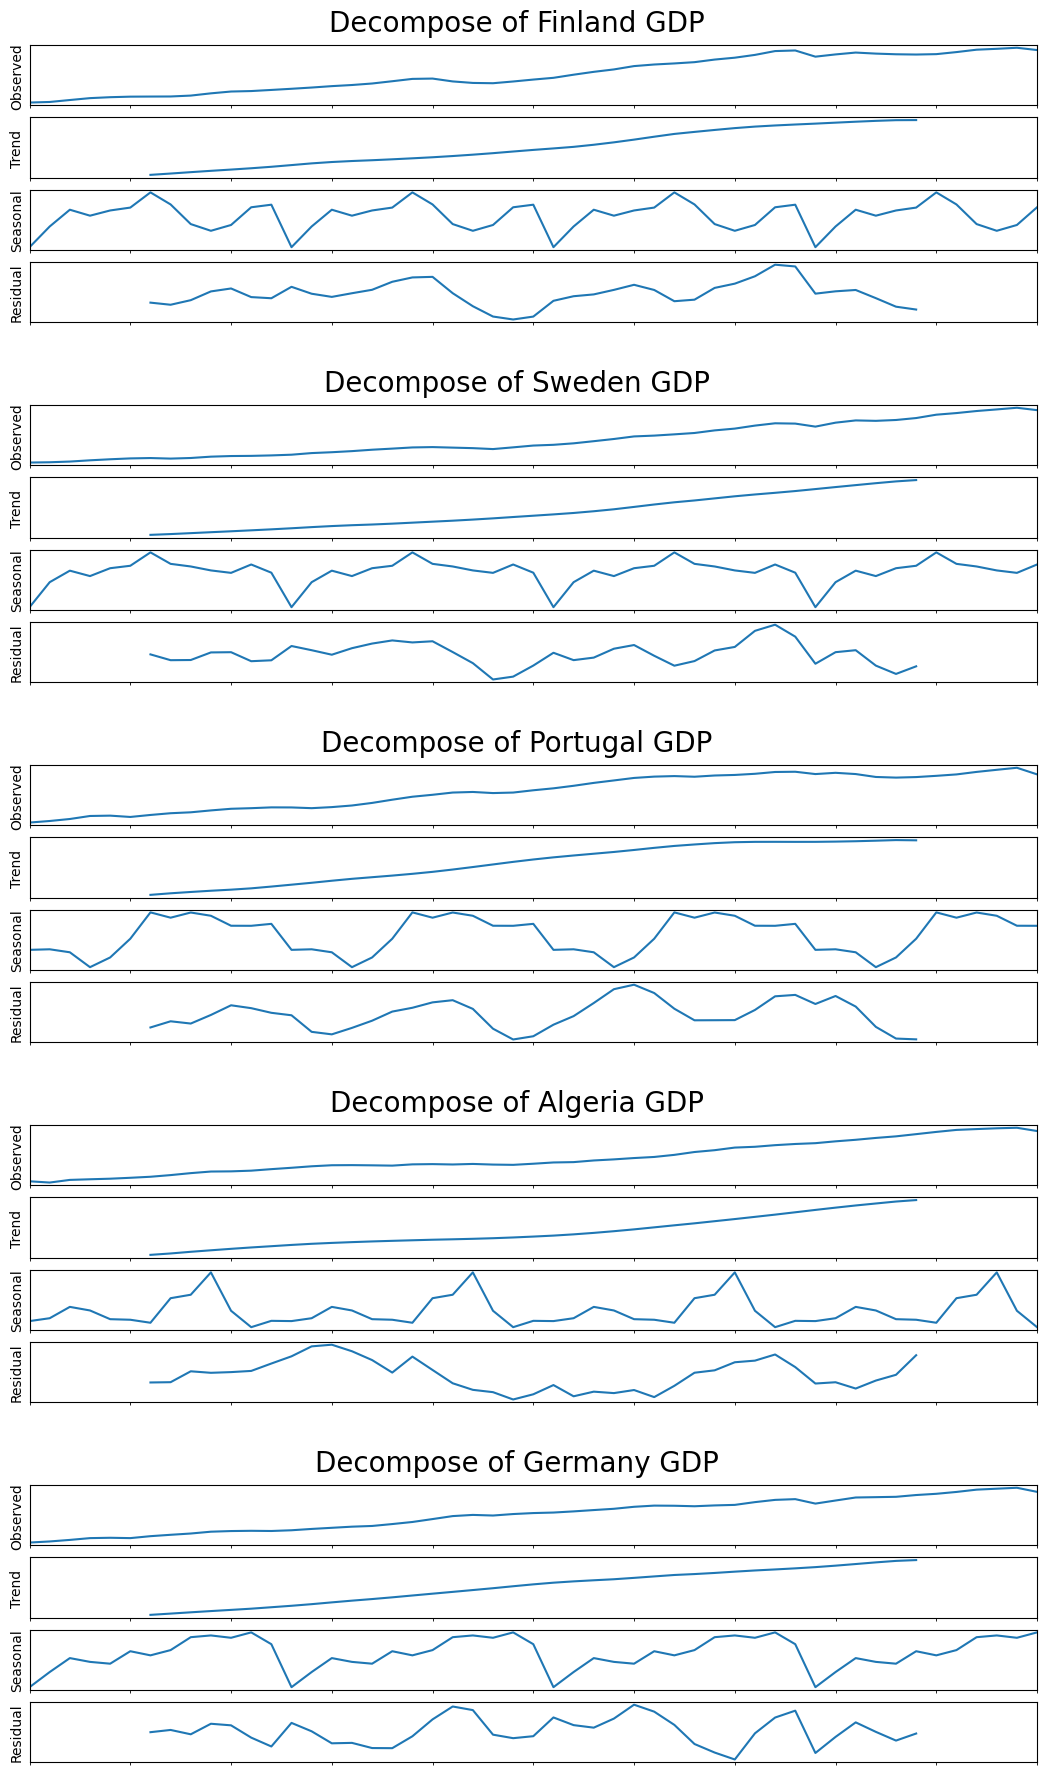

In [19]:
fig = plt.figure(figsize = (13, 18))

subfigs = fig.subfigures(5, 1)

for outerind, subfig in enumerate(subfigs.flat):
    decompose_data_add = seasonal_decompose(df_list[outerind]['GDP'], model = 'additive', period = seasons_list[idx])
    subfig.suptitle(f'Decompose of {nation_list[outerind]} GDP', fontsize = 20)
    axs = subfig.subplots(4, 1)
    f.plotseasonal(decompose_data_add, axs[:])
    for innerind, ax in enumerate(axs.flat):
        ax.set_xticks([])
        ax.set_yticks([])
 
plt.show()

# 9. Stationarity check

## 9.1 Visual stationarity

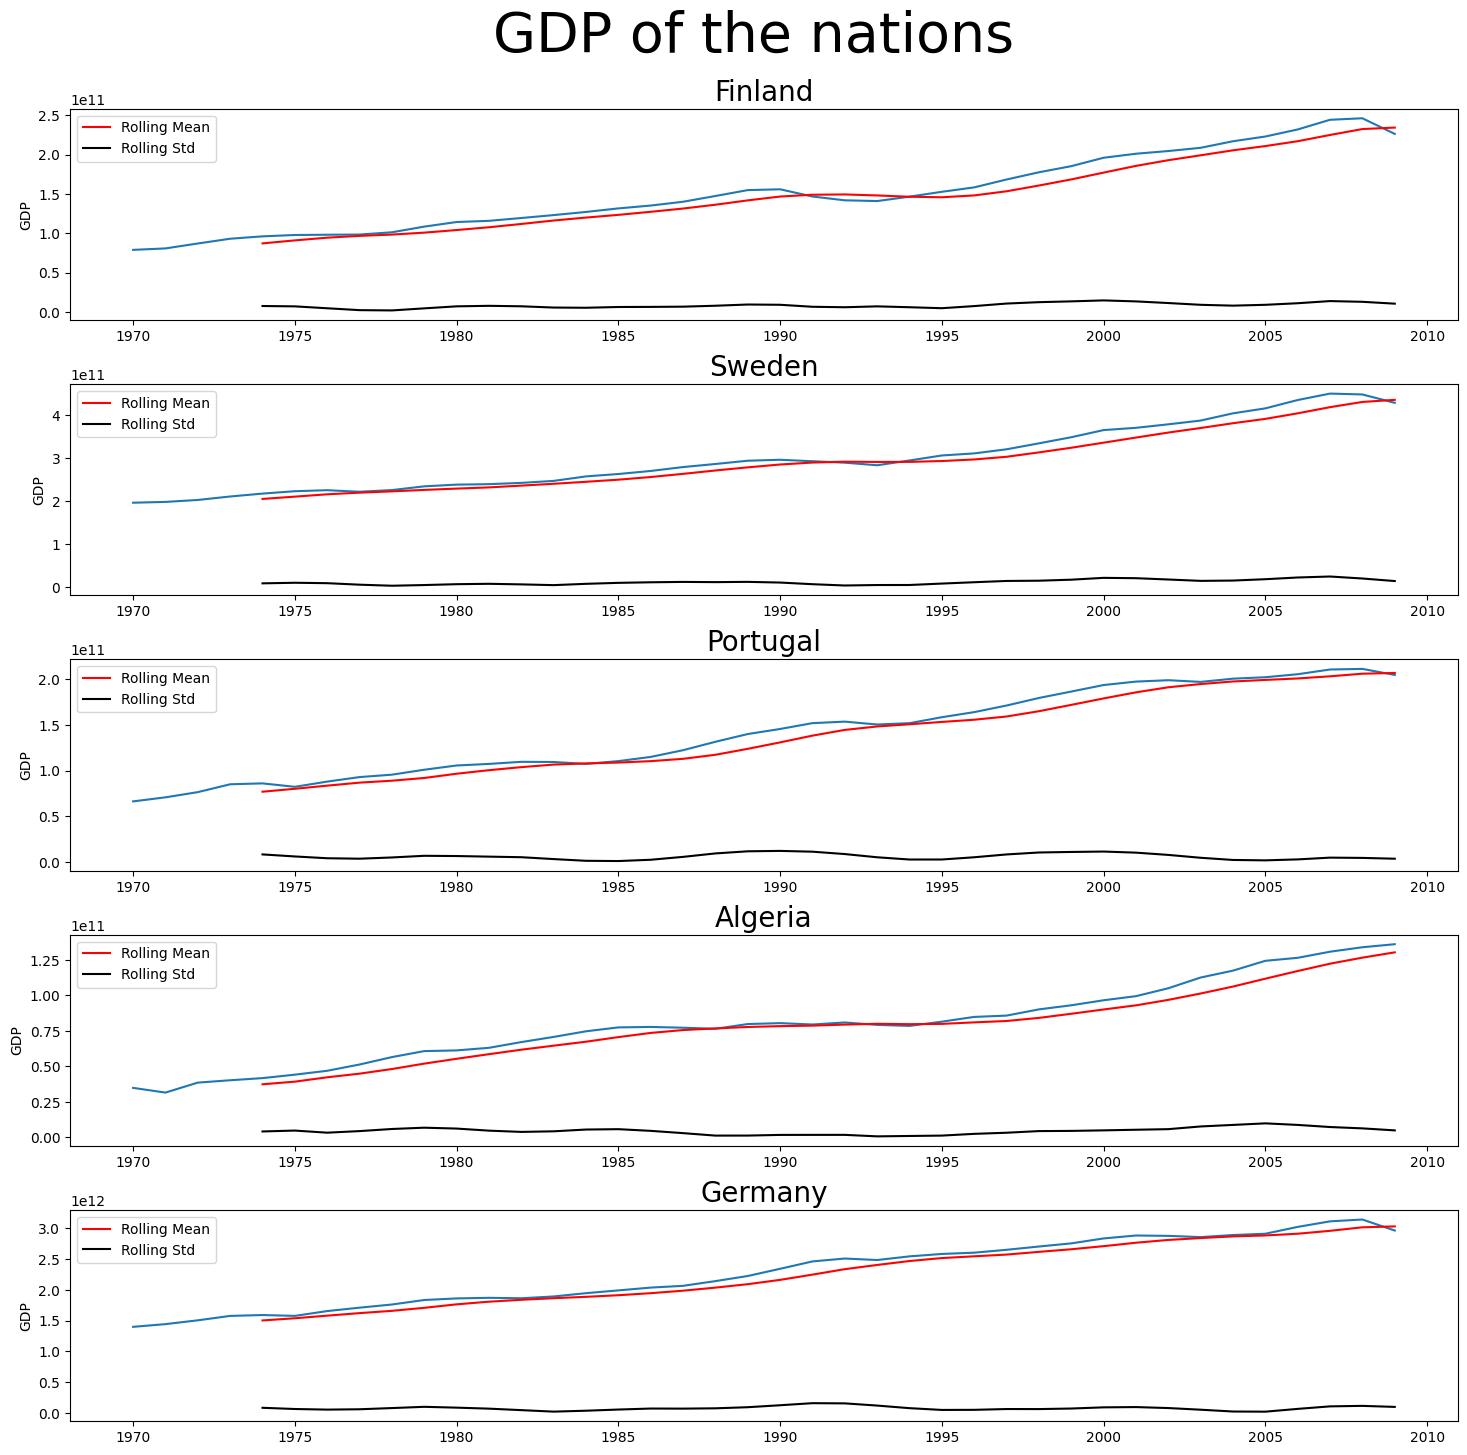

In [20]:
f.roll_mean_std_plot(df_train_test, nation_list, 5)

## 9.2 Statistics stationarity

In [21]:
f.check_stationarity(df_list, df_train_test, nation_list)

,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-0.466427,0.898403,No,0.871910,0.01,No
Sweden,-1.236686,0.657619,No,0.865320,0.01,No
Portugal,-1.794698,0.383097,No,0.896777,0.01,No
Algeria,-0.470613,0.897625,No,0.862571,0.01,No
Germany,-1.036319,0.739788,No,0.901137,0.01,No


## 9.3 Achieving stationarity

In [22]:
df_train_test_log_dif = {}

for idx, nation in enumerate(nation_list):
    df_train_test_log_dif[nation] = f.difference(df_train_test, 1, nation)

print('Stationarity check after first order differencing')
stationarity_df =  f.check_stationarity(df_list, df_train_test_log_dif, nation_list)
stationarity_df

Stationarity check after first order differencing


,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-3.358618,0.012453,Yes,0.076583,0.1,Yes
Sweden,-2.878037,0.047962,Yes,0.171736,0.1,Yes
Portugal,-3.433653,0.009864,Yes,0.112797,0.1,Yes
Algeria,-3.591460,0.005926,Yes,0.224629,0.1,Yes
Germany,-3.564720,0.006472,Yes,0.153294,0.1,Yes


1. ADF AND KPSS indicate stationarity --> do nothing
2. ADF indicates stationarity and KPSS no --> first order differencing
3. KPSS indicates stationarity and ADF no --> detrend with seasonal_decompose
4. Both indicate non-stationarity --> first order differencing

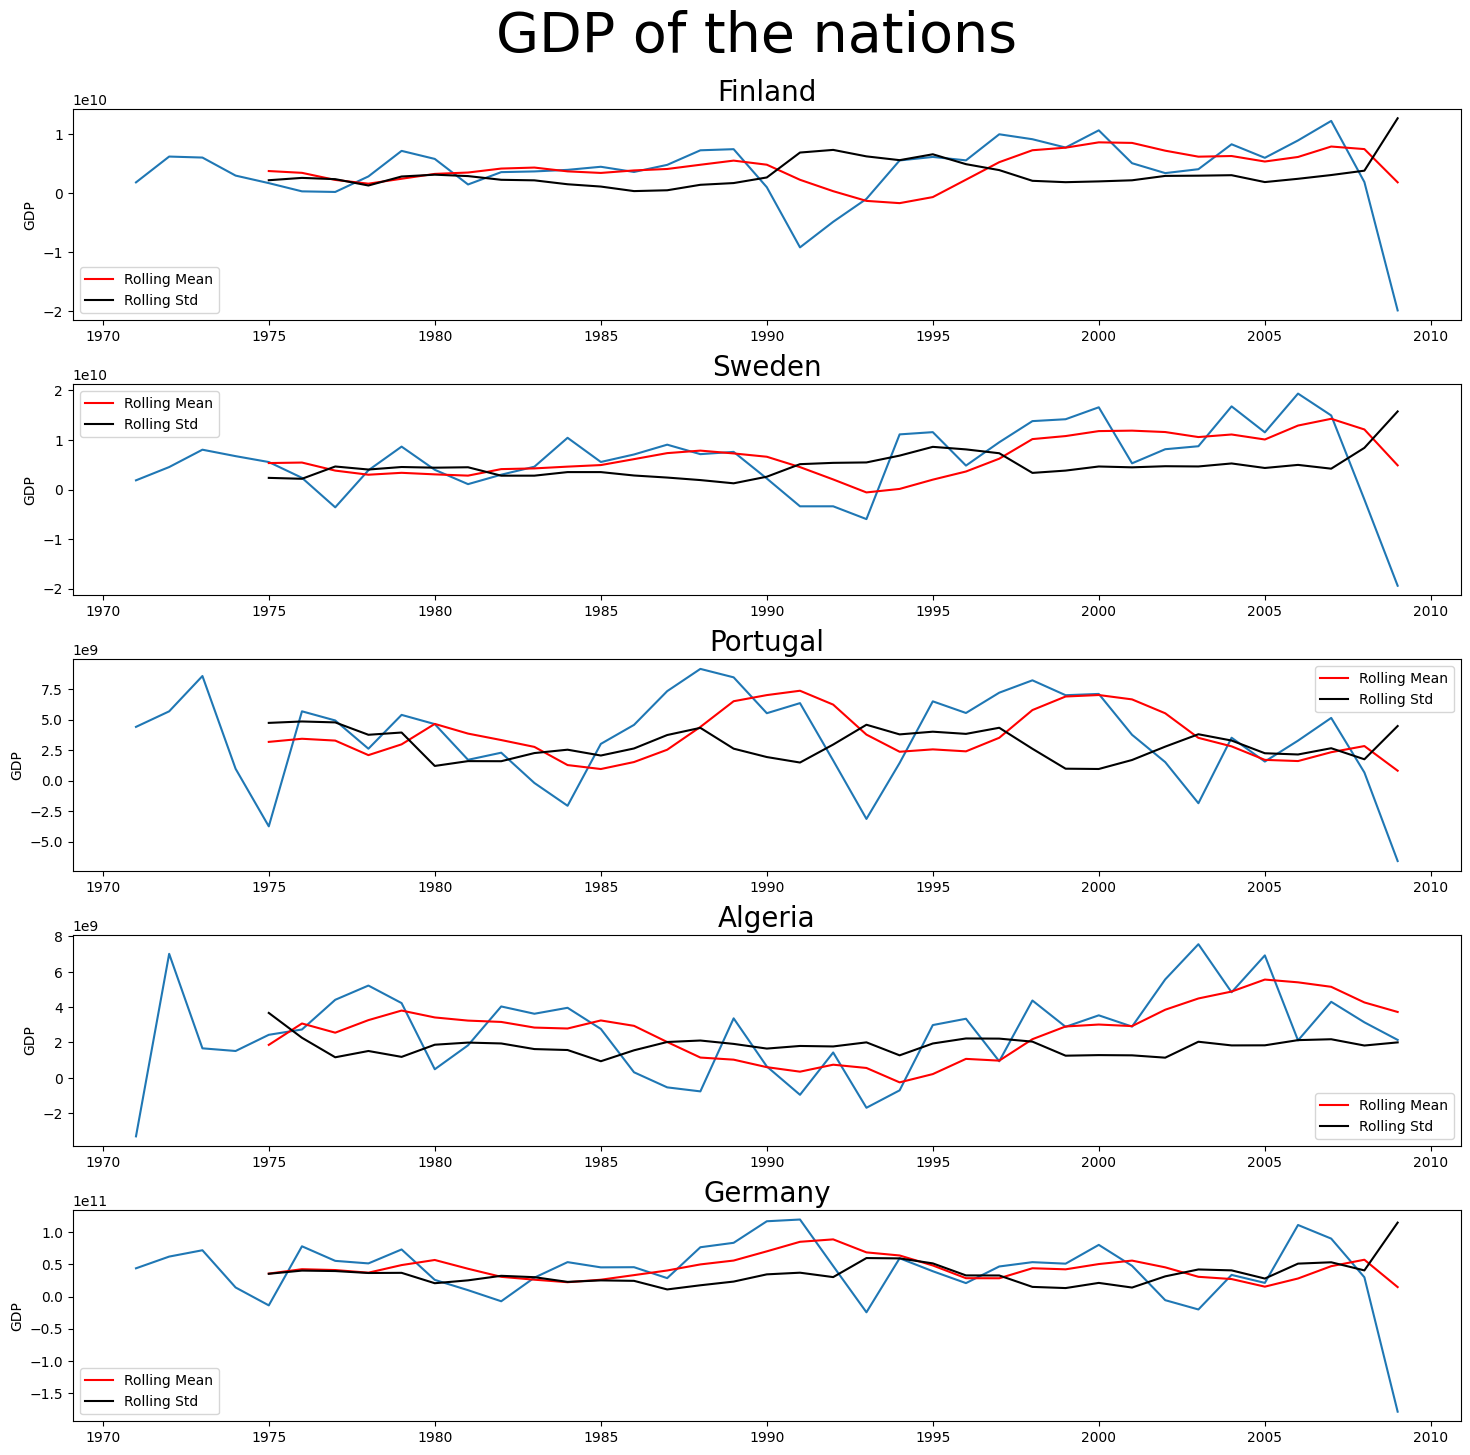

In [23]:
f.roll_mean_std_plot(df_train_test_log_dif, nation_list, 5)

## 9.4 ACF and PACF on differenced data

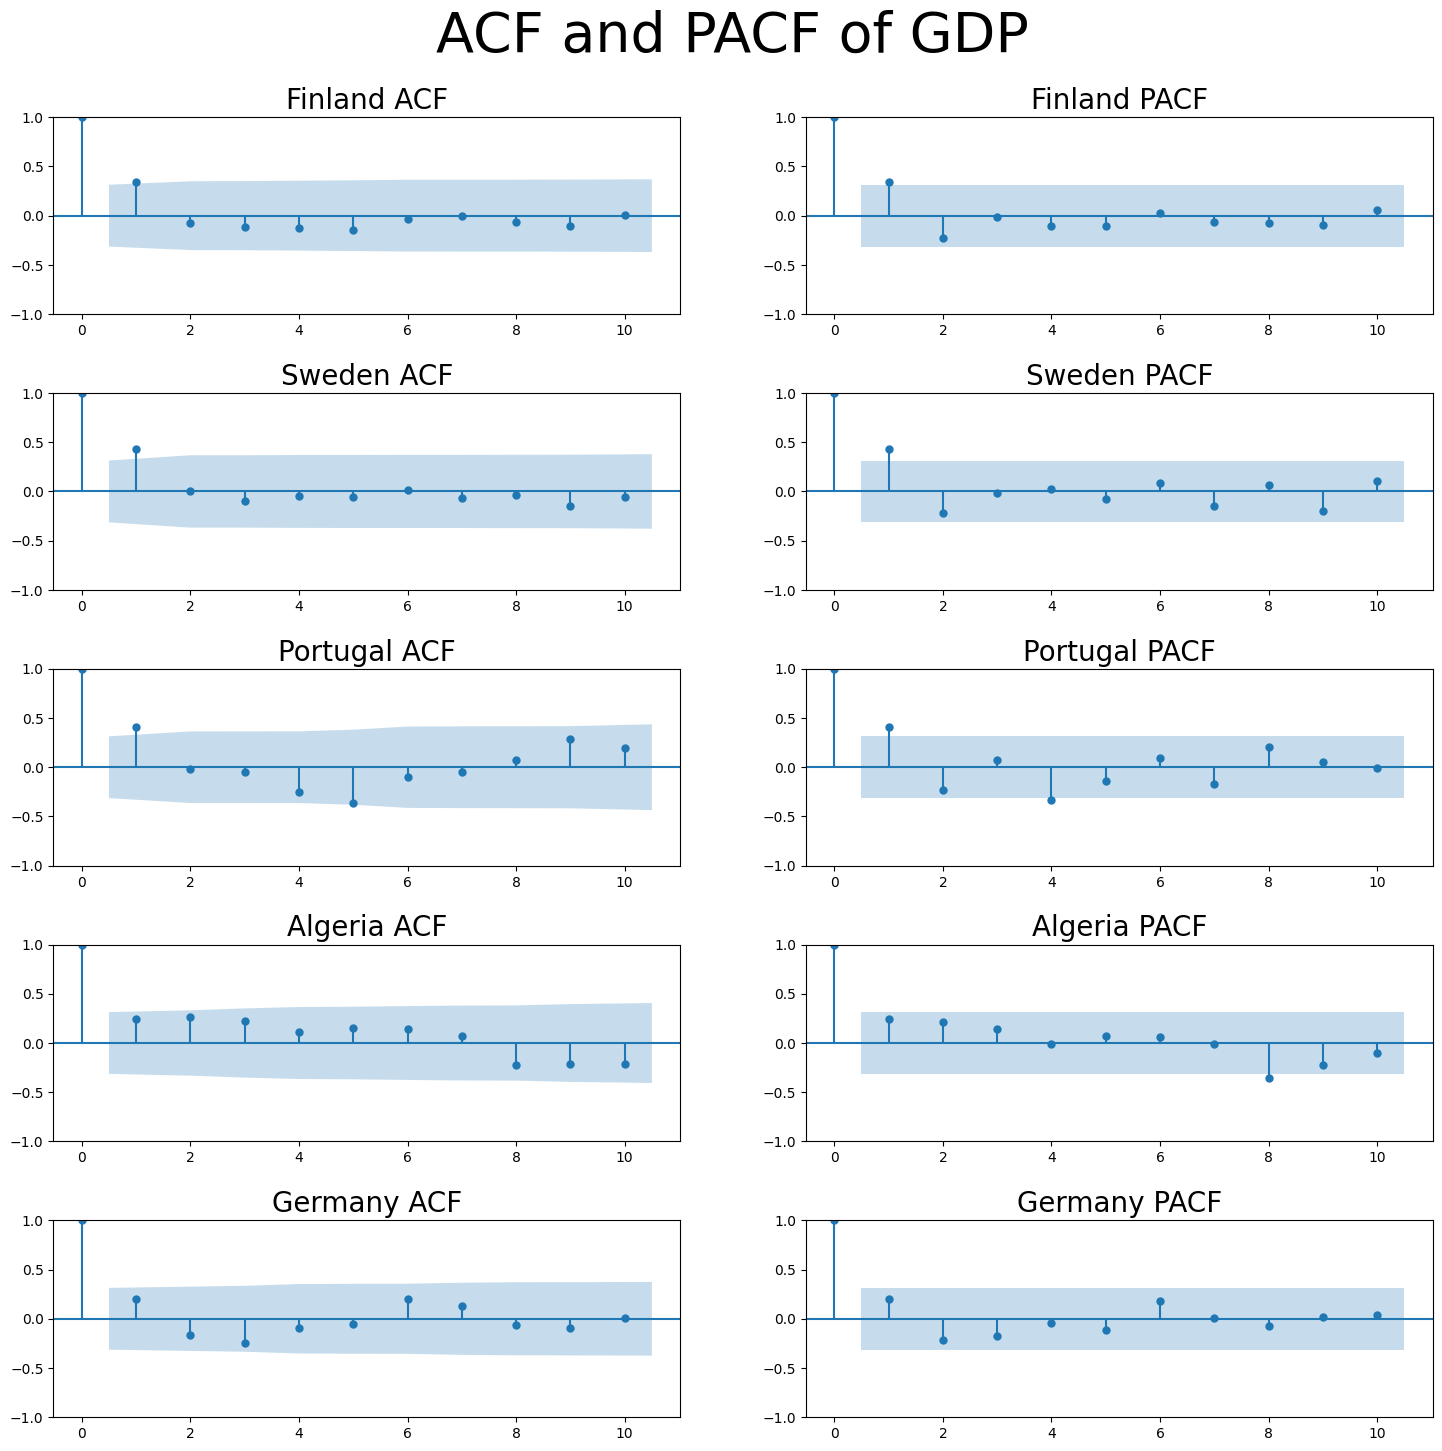

In [24]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 10. Models

## 10.0 Metrics

In [25]:
metrics_list_of_df = f.create_metrics_df()

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE


Sweden


,Model_name,AIC,MAE,RMSE,MAPE


Portugal


,Model_name,AIC,MAE,RMSE,MAPE


Algeria


,Model_name,AIC,MAE,RMSE,MAPE


Germany


,Model_name,AIC,MAE,RMSE,MAPE


## 10.1 Arimax

### 10.1.1 Model identification/estimation

In [26]:
order_list, arima_model_list = f.arima_order(nation_list, df_train_test)

Finland
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-138.384, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-136.957, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-140.358, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-140.356, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-139.367, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-143.544, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-141.778, Time=0.20 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-140.502, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-138.627, Time=0.22 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-145.699, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-142.689, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-144.095, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-143.640, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-144.506, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0]  

In [27]:
order_list

[(0, 2, 2), (0, 2, 1), (0, 2, 1), (1, 2, 1), (0, 2, 0)]

### 10.1.2 Model diagnostics

Summary and diagnostics for Finland's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  79.849
Date:                Mon, 20 Jan 2025   AIC                           -145.699
Time:                        16:12:18   BIC                           -134.236
Sample:                             0   HQIC                          -141.620
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1423      0.111      1.281      0.200      -0.075       0.360
x2            -0.1001      0.092     -1.091      0.275      -0.280       0.080
x

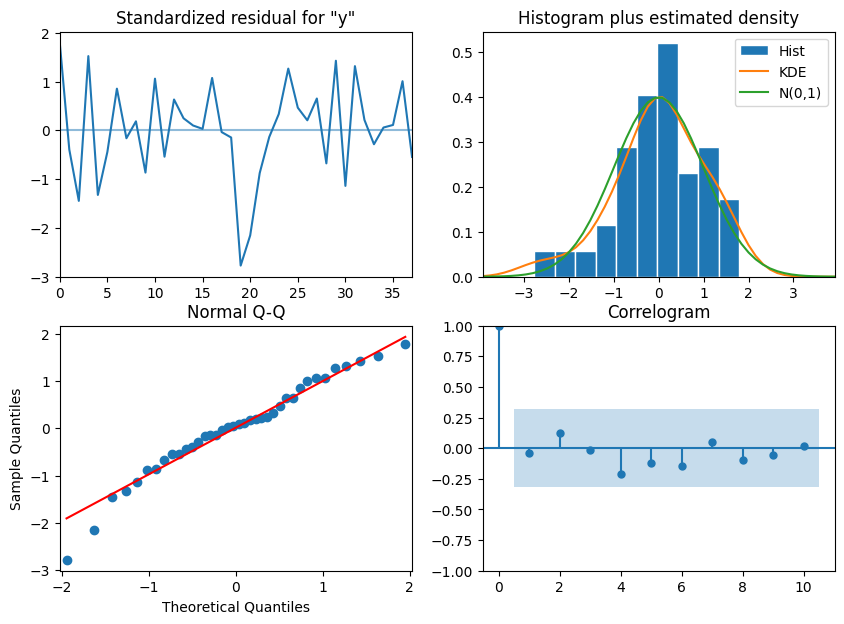

--------------------------------------
Summary and diagnostics for Sweden's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  78.015
Date:                Mon, 20 Jan 2025   AIC                           -144.029
Time:                        16:12:19   BIC                           -134.204
Sample:                             0   HQIC                          -140.533
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3574      0.181      1.980      0.048       0.004       0.711
x2            -0.2357      0.124     -1.90

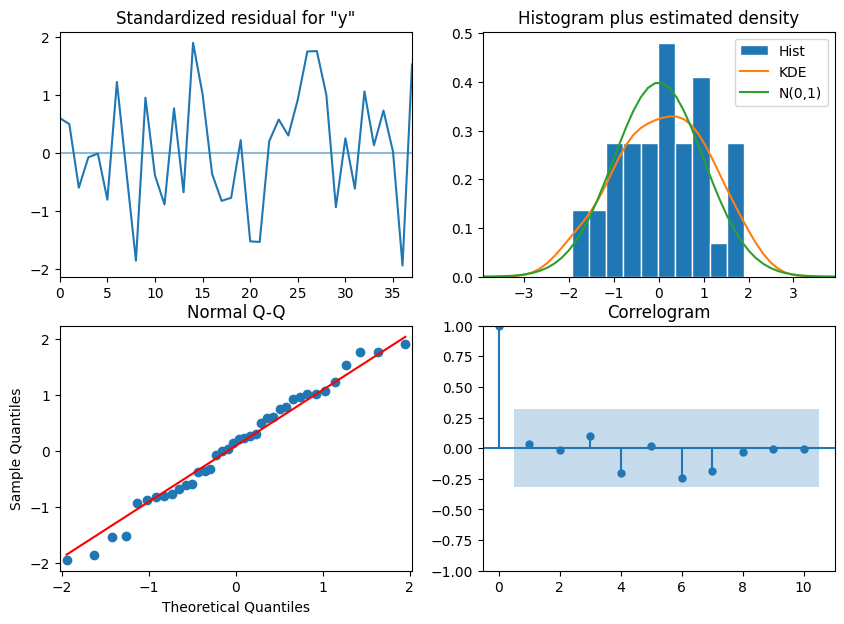

--------------------------------------
Summary and diagnostics for Portugal's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  71.606
Date:                Mon, 20 Jan 2025   AIC                           -131.213
Time:                        16:12:19   BIC                           -121.387
Sample:                             0   HQIC                          -127.717
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0183      0.111      0.165      0.869      -0.199       0.236
x2             0.1281      0.170      0.

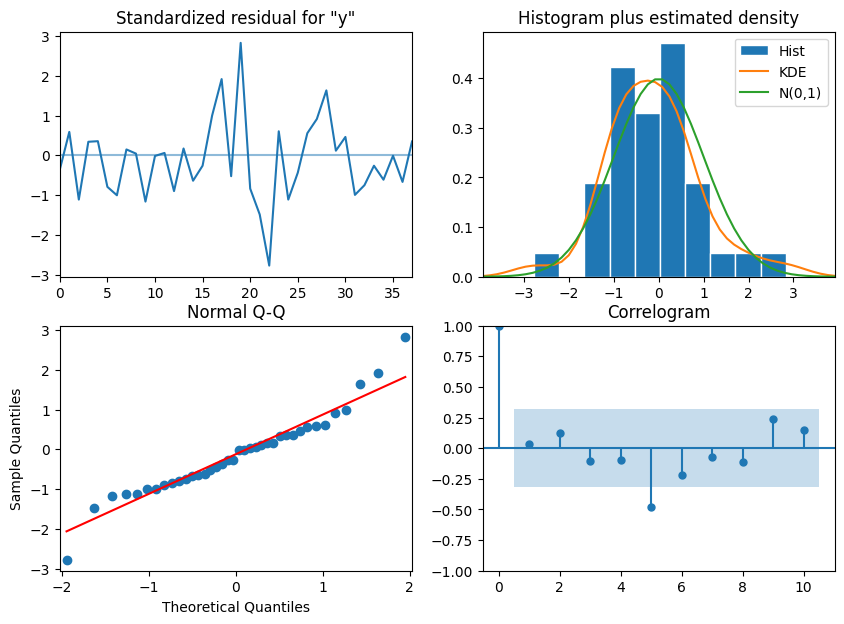

--------------------------------------
Summary and diagnostics for Algeria's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  67.995
Date:                Mon, 20 Jan 2025   AIC                           -121.991
Time:                        16:12:20   BIC                           -110.527
Sample:                             0   HQIC                          -117.912
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3099      0.039      7.882      0.000       0.233       0.387
x2             0.0063      0.034      0.1

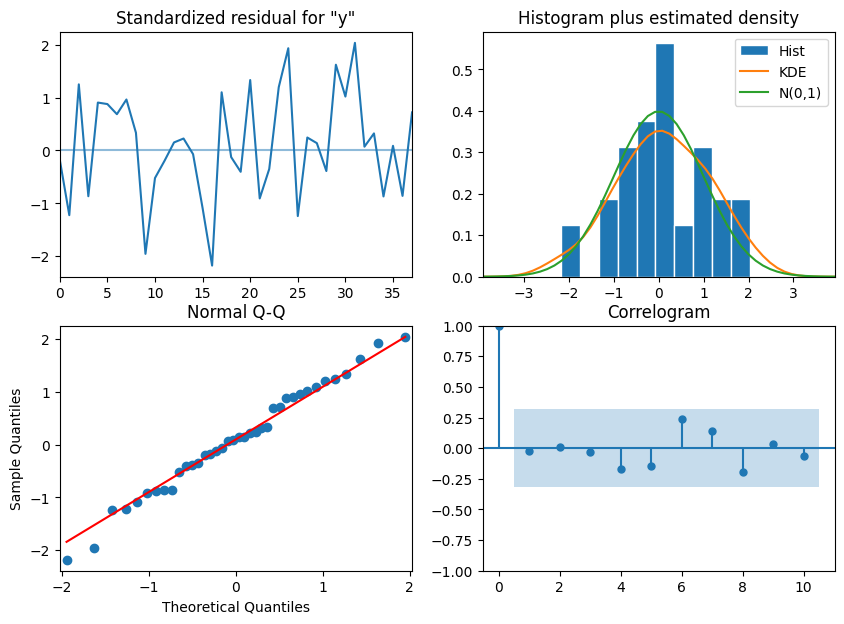

--------------------------------------
Summary and diagnostics for Germany's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  82.233
Date:                Mon, 20 Jan 2025   AIC                           -154.465
Time:                        16:12:20   BIC                           -146.277
Sample:                             0   HQIC                          -151.552
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3725      0.094      3.972      0.000       0.189       0.556
x2            -0.2156      0.096     -2.2

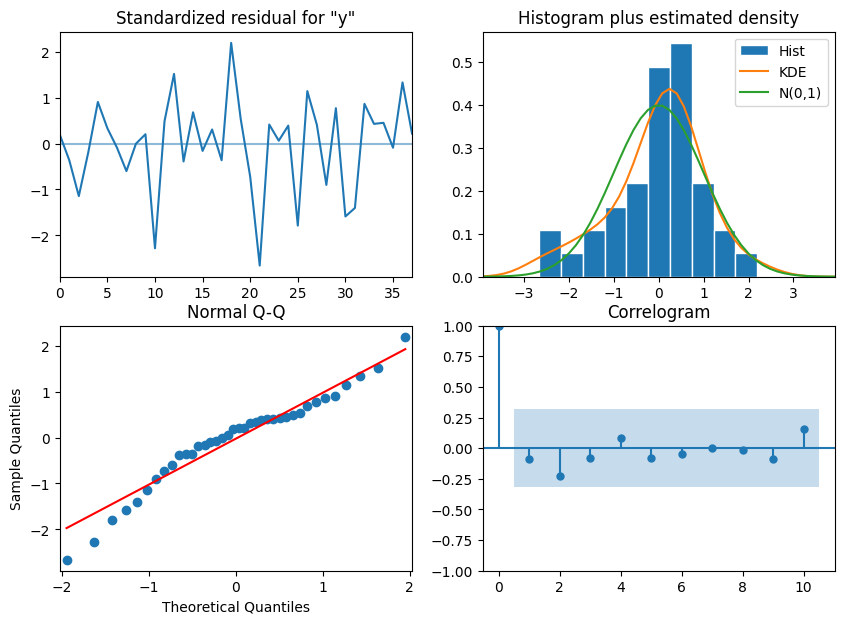

--------------------------------------


In [28]:
f.arima_diagnostics(arima_model_list, nation_list)

In [29]:
f.res_stats(arima_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's model: 2.062663442865388


,lb_stat,lb_pvalue
1,0.055371,0.813968
2,0.773623,0.679219
3,0.777937,0.854737
4,2.856289,0.582156
5,3.553776,0.615267
6,4.577669,0.599002
7,4.714306,0.694781
8,5.186518,0.737467
9,5.360011,0.801864
10,5.373239,0.864893


JB p-value for standardized residuals of Finland's model: (useless, too few samples) 0.23260500158664985
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Sweden's model: 1.8696477090311534


,lb_stat,lb_pvalue
1,0.038448,0.844547
2,0.048430,0.976076
3,0.530979,0.912035
4,2.415350,0.659855
5,2.438792,0.785684
6,5.213347,0.516755
7,7.056432,0.423028
8,7.100050,0.525878
9,7.100290,0.626678
10,7.100594,0.715915


JB p-value for standardized residuals of Sweden's model: (useless, too few samples) 0.7132329966258404
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Portugal's model: 1.9036143537787311


,lb_stat,lb_pvalue
1,0.043684,0.834442
2,0.779010,0.677392
3,1.291139,0.731238
4,1.755339,0.780642
5,12.630306,0.027101
6,14.927809,0.020826
7,15.241333,0.033027
8,15.888661,0.044002
9,18.995855,0.025228
10,20.167339,0.027709


JB p-value for standardized residuals of Portugal's model: (useless, too few samples) 0.061212587158773396
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Algeria's model: 2.0083540368508364


,lb_stat,lb_pvalue
1,0.015726,0.900204
2,0.025707,0.987229
3,0.068692,0.995309
4,1.409645,0.842517
5,2.372446,0.795570
6,5.146355,0.525184
7,6.071460,0.531431
8,8.192353,0.414910
9,8.246284,0.509530
10,8.462015,0.583803


JB p-value for standardized residuals of Algeria's model: (useless, too few samples) 0.8729042788912383
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 2.1689375363949264


,lb_stat,lb_pvalue
1,0.316932,0.573457
2,2.553102,0.278998
3,2.864190,0.413042
4,3.198206,0.525221
5,3.495727,0.624034
6,3.588139,0.732209
7,3.588148,0.825803
8,3.598244,0.891433
9,4.046185,0.908346
10,5.414448,0.861831


JB p-value for standardized residuals of Germany's model: (useless, too few samples) 0.1871173383736967
-------------------------------------------------------------------------------


### 10.1.3 Model prediction

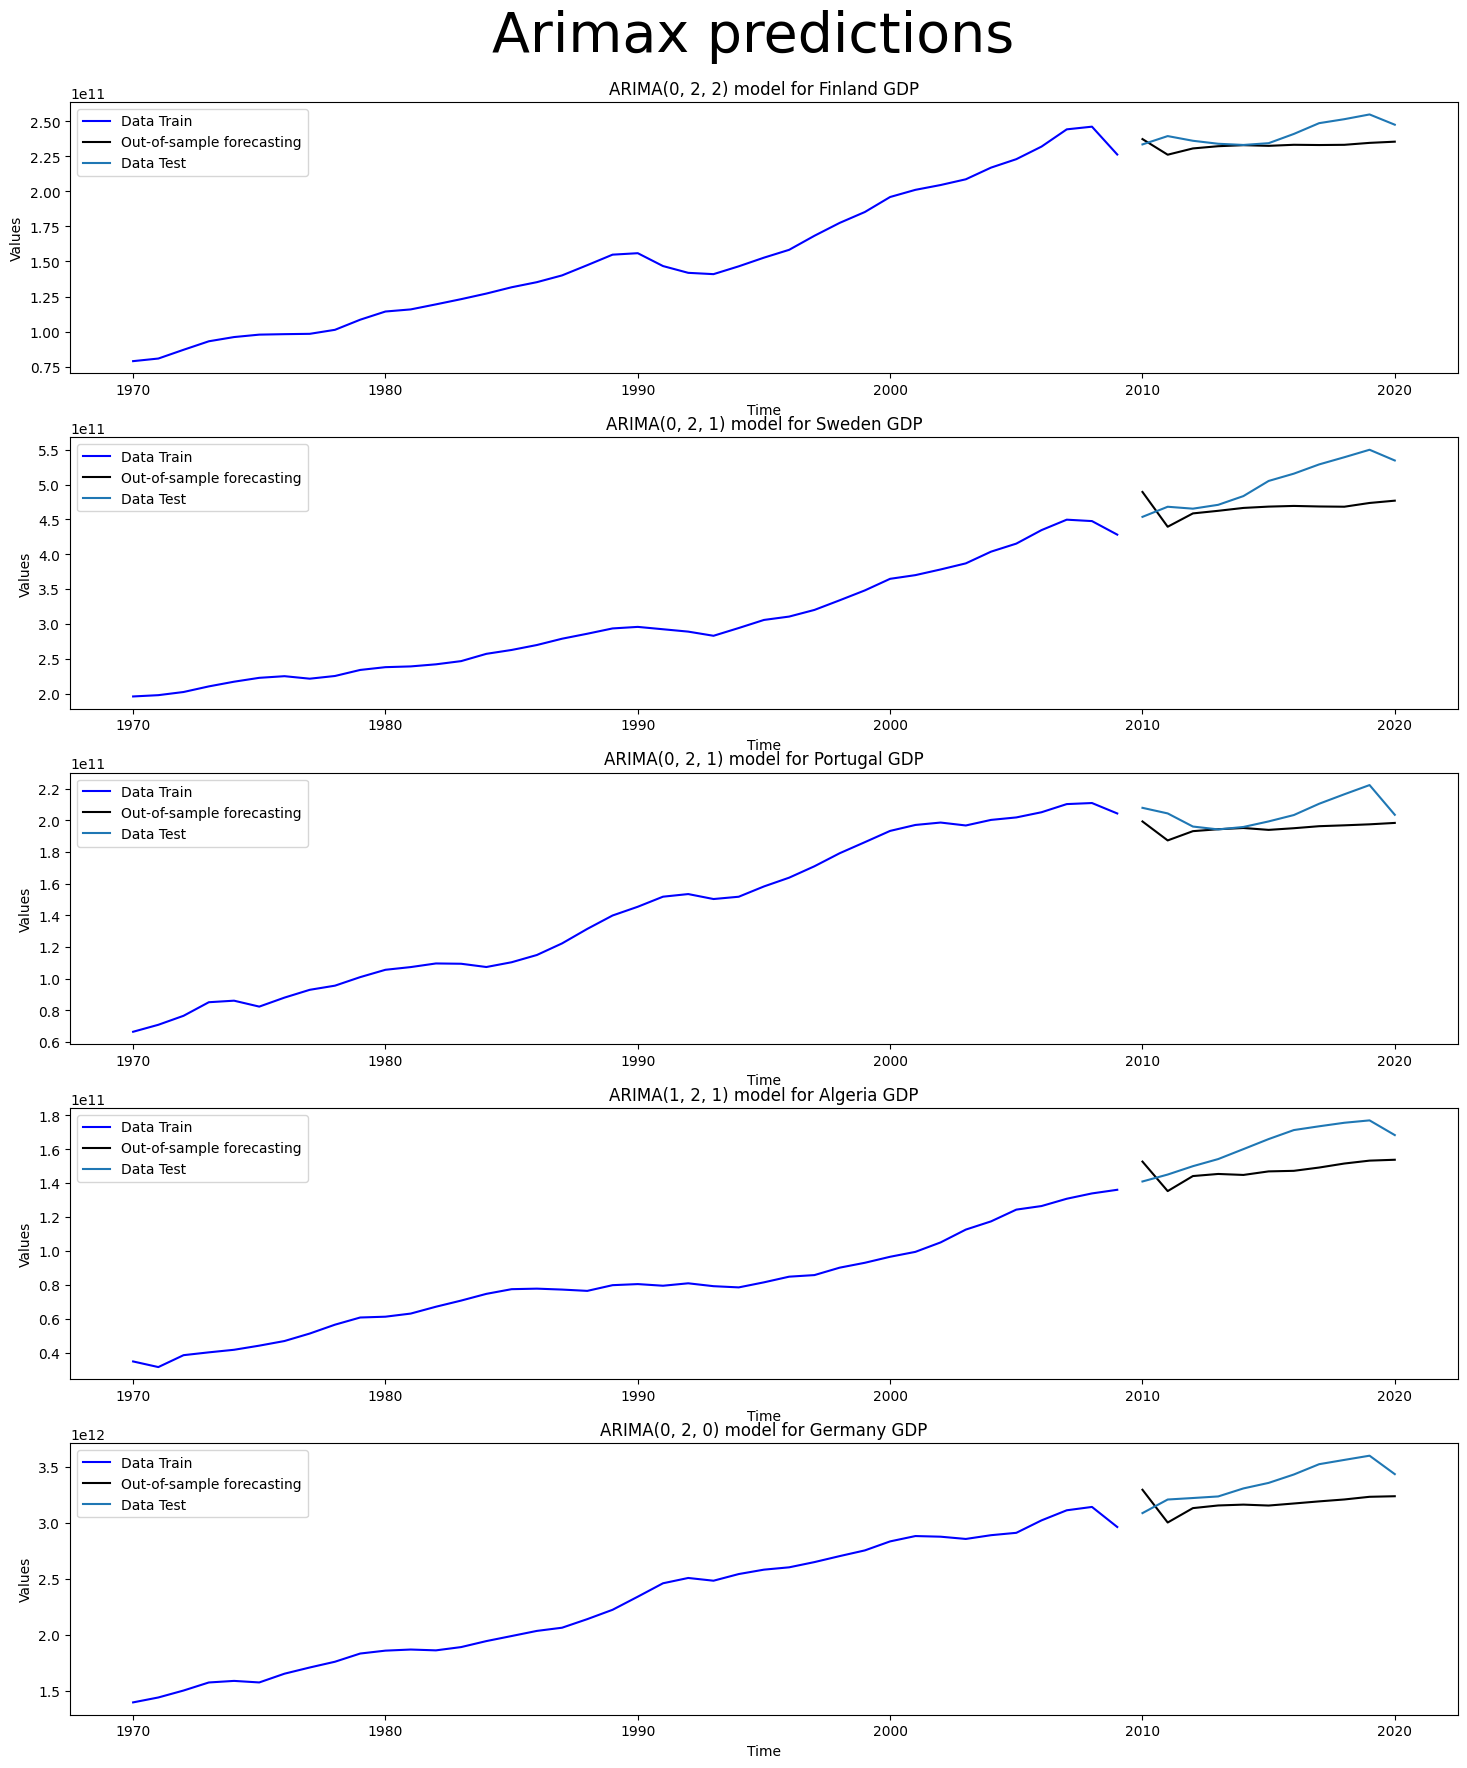

In [30]:
arima_prediction_list = f.arima_prediction_plot(arima_model_list, nation_list, order_list, df_train_test)

In [31]:
metrics_list_of_df = f.add_metrics('ARIMAX', arima_model_list, metrics_list_of_df, df_train_test, nation_list, arima_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-145.698941,9129753769.205559,11379151749.569609,0.03703


Sweden


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-144.029068,40448606852.624504,46521924725.943939,0.078424


Portugal


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-131.212962,9703147281.7558,12426903936.528591,0.046014


Algeria


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-121.990519,16458341234.786371,17736584305.094528,0.099455


Germany


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-154.46529,221597836767.304688,240551789171.569183,0.065097


## 10.2 ETS

### 10.2.1 Model identification

In [32]:
ets_model_list, ets_params = f.ets_order(df_train_test, nation_list)

In [33]:
ets_params

,Error,Trend,Seasonal,Seasonal period,Damped trend
Finland,mul,add,add,12,False
Sweden,add,mul,mul,8,False
Portugal,add,add,mul,9,False
Algeria,add,mul,mul,9,False
Germany,mul,mul,mul,13,False


### 10.2.2 Model diagnostics

In [34]:
f.res_stats(ets_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's model: 0.6744527500377289


,lb_stat,lb_pvalue
1,5.474416,0.019297
2,5.480115,0.064567
3,5.538142,0.136375
4,5.616406,0.229685
5,5.698898,0.336628
6,5.722217,0.455016
7,5.741776,0.570204
8,6.123919,0.633353
9,8.249922,0.509170
10,8.335256,0.596125


JB p-value for standardized residuals of Finland's model: (useless, too few samples) 4.834619760652476e-27
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Sweden's model: 0.8014870436386808


,lb_stat,lb_pvalue
1,8.423386,0.003704
2,8.434411,0.014740
3,8.985830,0.029480
4,9.283049,0.054401
5,9.301886,0.097612
6,9.574555,0.143750
7,10.381127,0.167984
8,14.600312,0.067399
9,17.673173,0.039160
10,17.745506,0.059411


JB p-value for standardized residuals of Sweden's model: (useless, too few samples) 0.3295983948165152
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Portugal's model: 1.2471888569698633


,lb_stat,lb_pvalue
1,0.526258,0.468184
2,0.690696,0.707974
3,1.062934,0.786029
4,1.218482,0.875046
5,1.772598,0.879630
6,2.557755,0.861949
7,3.475648,0.837798
8,3.561678,0.894350
9,3.722719,0.928697
10,3.726234,0.958853


JB p-value for standardized residuals of Portugal's model: (useless, too few samples) 3.7916639807787543e-19
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Algeria's model: 1.7843680003533684


,lb_stat,lb_pvalue
1,0.380466,0.537354
2,2.250340,0.324597
3,2.251053,0.521963
4,2.486558,0.647044
5,2.876035,0.719090
6,4.430502,0.618627
7,5.875483,0.554362
8,10.386635,0.238931
9,14.521910,0.104933
10,14.689355,0.143805


JB p-value for standardized residuals of Algeria's model: (useless, too few samples) 4.2453362330101224e-17
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's model: 1.191787692763207


,lb_stat,lb_pvalue
1,0.123082,0.725715
2,0.791945,0.673025
3,2.081478,0.555669
4,2.148037,0.708553
5,3.243024,0.662575
6,3.247008,0.777267
7,3.297275,0.856208
8,3.387744,0.907725
9,4.521235,0.873890
10,4.564703,0.918299


JB p-value for standardized residuals of Germany's model: (useless, too few samples) 4.8214365538808245e-87
-------------------------------------------------------------------------------


### 10.2.3 Model prediction

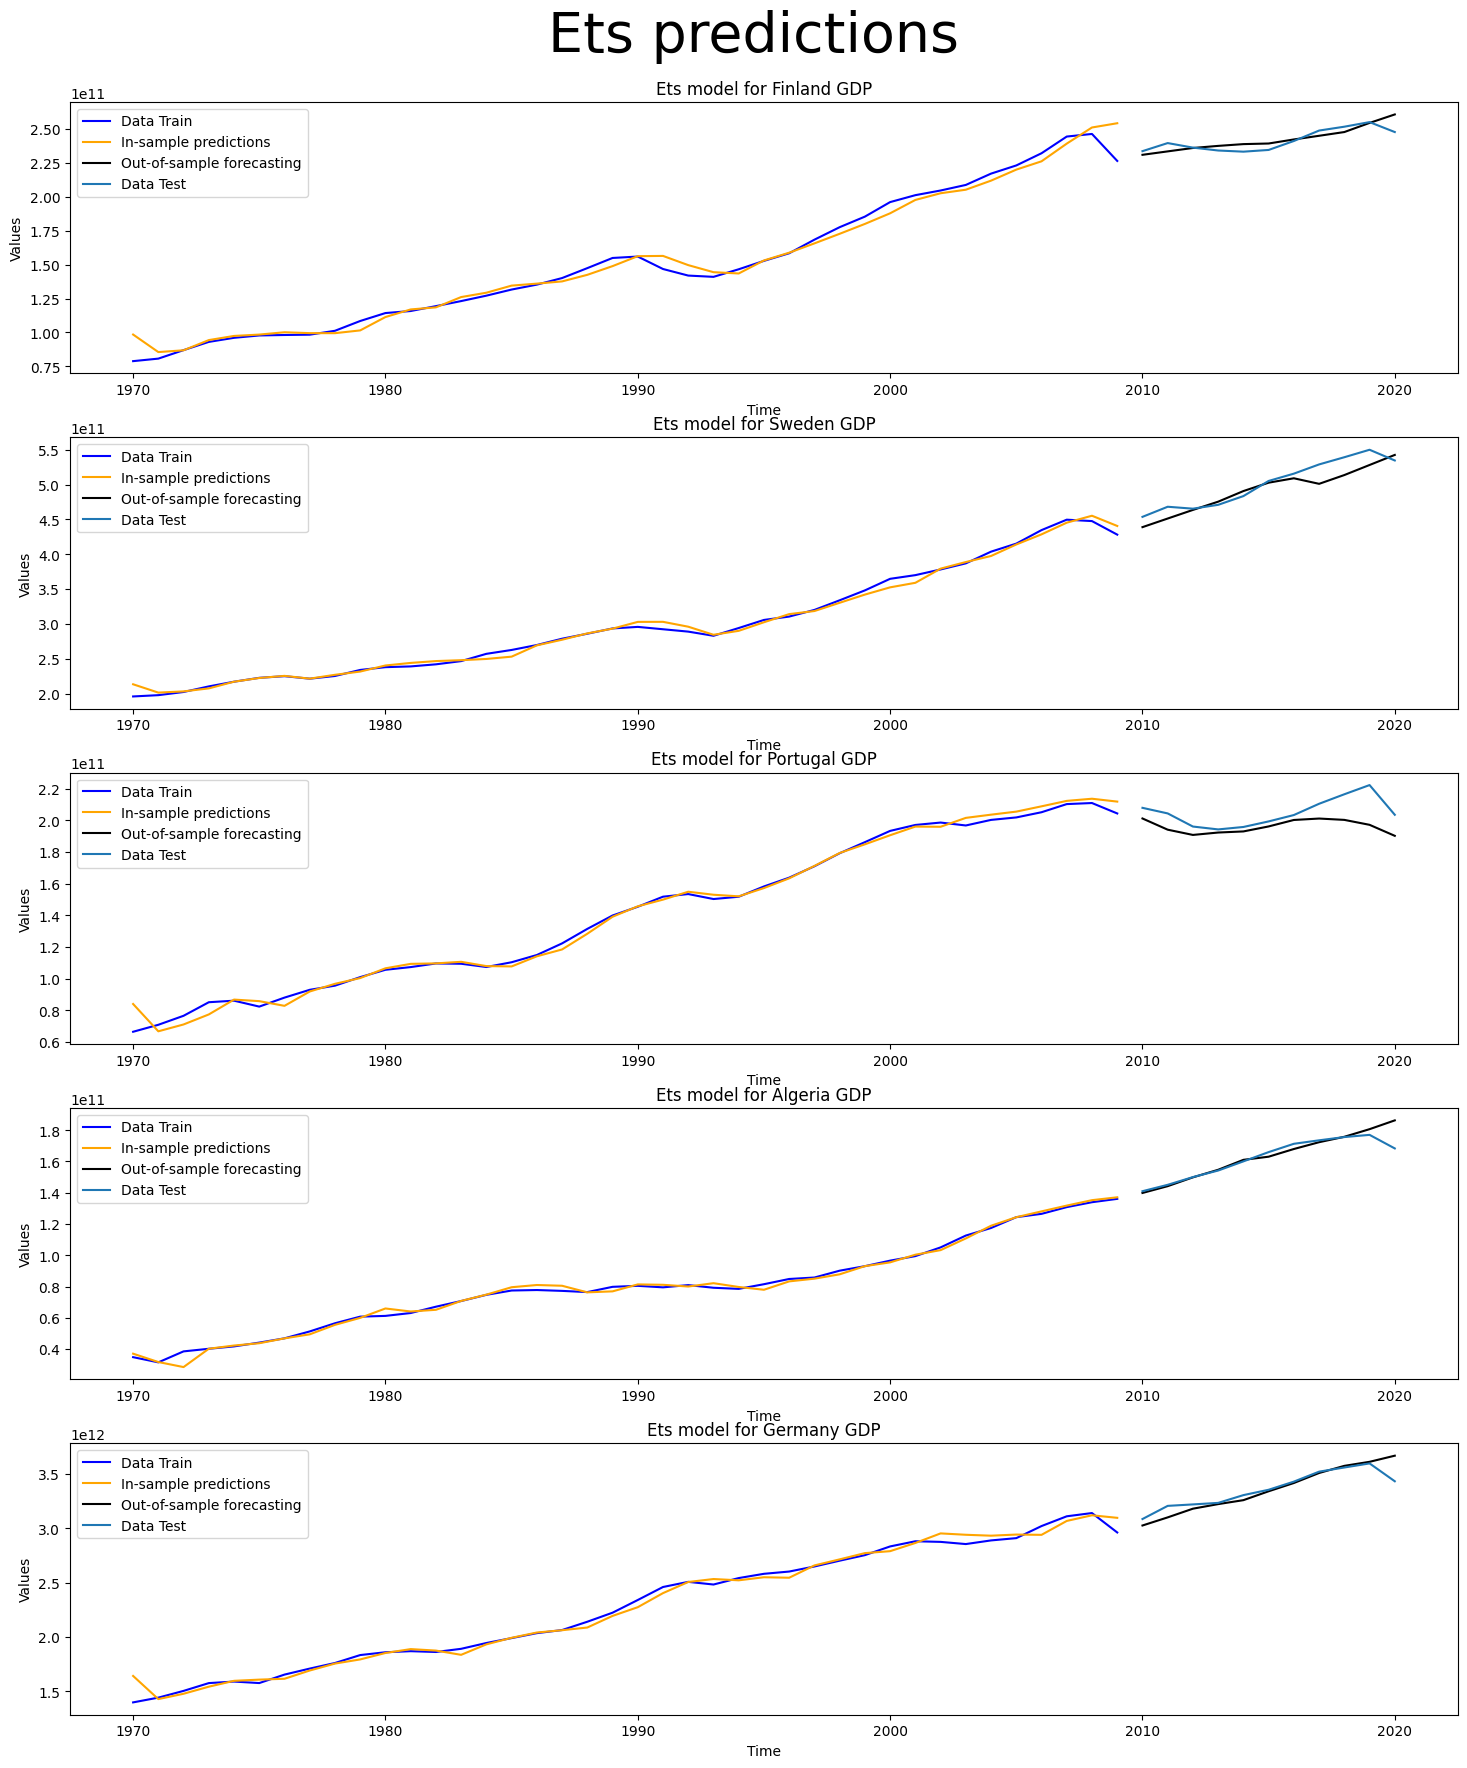

In [35]:
ets_prediction_list = f.ets_prediction_plot(ets_model_list, nation_list, df_train_test)

In [36]:
metrics_list_of_df = f.add_metrics('ETS', ets_model_list, metrics_list_of_df, df_train_test, nation_list, ets_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-145.698941,9129753769.205559,11379151749.569609,0.03703
0,ETS,1956.542285,4117085592.005557,5307628891.079964,0.01704


Sweden


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-144.029068,40448606852.624504,46521924725.943939,0.078424
0,ETS,1942.438879,12494869883.661222,15361134317.354982,0.024486


Portugal


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-131.212962,9703147281.7558,12426903936.528591,0.046014
0,ETS,1913.305972,8843821833.598675,11146055131.349855,0.042069


Algeria


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-121.990519,16458341234.786371,17736584305.094528,0.099455
0,ETS,1870.375151,2985126765.921648,5715523647.835147,0.01786


Germany


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-154.46529,221597836767.304688,240551789171.569183,0.065097
0,ETS,2142.833062,51543010795.634499,82608490133.22438,0.015487


## 10.3 Vector Autoregressive 1

### 10.3.1 Model identification

In [37]:
grangers_col_list = f.grangers_causation_columns(df_train_test_log_dif, nation_list)

Finland
Best columns: ['Imports', 'Manufacturing']
Sweden
Best columns: ['Manufacturing', 'Gross_capital']
Portugal
Best columns: ['Exports', 'Manufacturing']
Algeria
Best columns: ['Imports', 'Gross_capital']
Germany
Best columns: ['Exports', 'Imports']


In [38]:
varmax_order, varmax_model_list = f.varma1_order(df_train_test_log_dif, nation_list, grangers_col_list)

Processing nation: Finland
Best order for Finland: (p, q)=(1, 1), AIC=3544.975388399646
Processing nation: Sweden
Best order for Sweden: (p, q)=(1, 1), AIC=3664.484819936802
Processing nation: Portugal
Best order for Portugal: (p, q)=(2, 1), AIC=3481.397424319394
Processing nation: Algeria
Best order for Algeria: (p, q)=(1, 1), AIC=3568.587125943985
Processing nation: Germany
Best order for Germany: (p, q)=(1, 1), AIC=3972.239645158906


### 10.3.2 Model diagnostics

try:
    f.arima_diagnostics(varmax_model_list, nation_list)
    f.res_stats(varmax_model_list, nation_list, df_train_test_log_dif)
except:
    pass

### 10.3.3 Model prediction

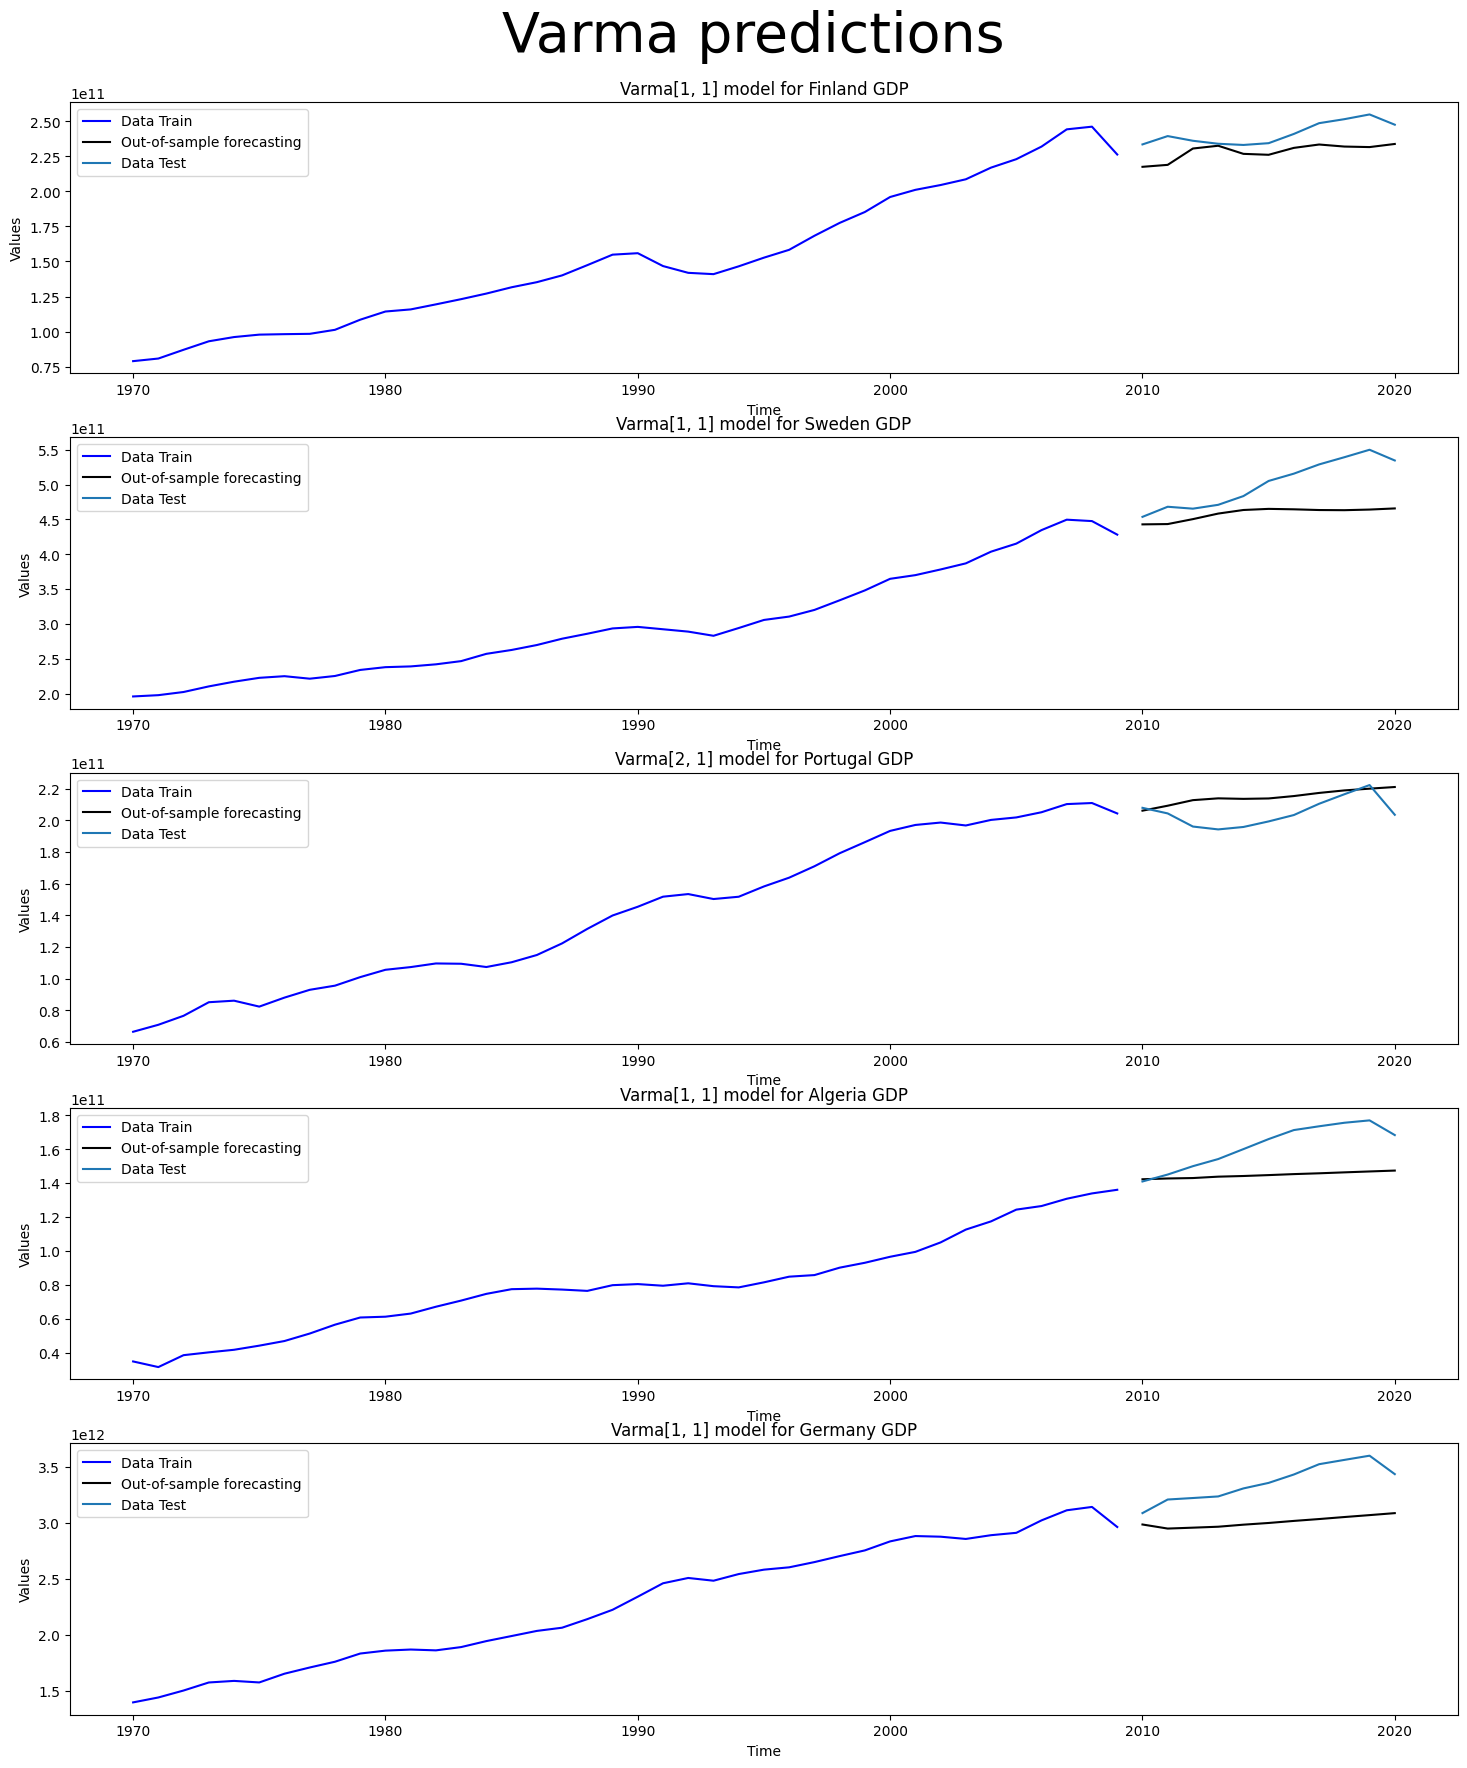

In [39]:
varmax_prediction_list = f.varma_prediction_plot(varmax_model_list, nation_list, varmax_order, df_train_test)

In [40]:
metrics_list_of_df = f.add_metrics('VARMA 1', varmax_model_list, metrics_list_of_df, df_train_test, nation_list, varmax_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-145.698941,9129753769.205559,11379151749.569609,0.03703
0,ETS,1956.542285,4117085592.005557,5307628891.079964,0.01704
0,VARMA 1,3544.975388,12716853389.725447,14345461801.068996,0.052126


Sweden


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-144.029068,40448606852.624504,46521924725.943939,0.078424
0,ETS,1942.438879,12494869883.661222,15361134317.354982,0.024486
0,VARMA 1,3664.48482,42731050558.961815,50314148439.786324,0.082217


Portugal


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-131.212962,9703147281.7558,12426903936.528591,0.046014
0,ETS,1913.305972,8843821833.598675,11146055131.349855,0.042069
0,VARMA 1,3481.397424,10571013539.219732,12522505691.467239,0.052819


Algeria


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-121.990519,16458341234.786371,17736584305.094528,0.099455
0,ETS,1870.375151,2985126765.921648,5715523647.835147,0.01786
0,VARMA 1,3568.587126,17459929028.964657,20245446322.356312,0.103502


Germany


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-154.46529,221597836767.304688,240551789171.569183,0.065097
0,ETS,2142.833062,51543010795.634499,82608490133.22438,0.015487
0,VARMA 1,3972.239645,351569567782.813416,372393020335.581482,0.10317


## 10.3 Vector Autoregressive 2

In [41]:
varmax_order, varmax_model_list = f.varma2_order(df_train_test_log_dif, nation_list)

Processing nation: Finland
Best order for Finland: (p, q)=(1, 1), AIC=8871.88063418985
Processing nation: Sweden
Best order for Sweden: (p, q)=(1, 1), AIC=9084.199447832341
Processing nation: Portugal
Best order for Portugal: (p, q)=(2, 1), AIC=8802.286452678802
Processing nation: Algeria
Best order for Algeria: (p, q)=(1, 1), AIC=8753.990775478362
Processing nation: Germany
Best order for Germany: (p, q)=(1, 1), AIC=9786.8234026027


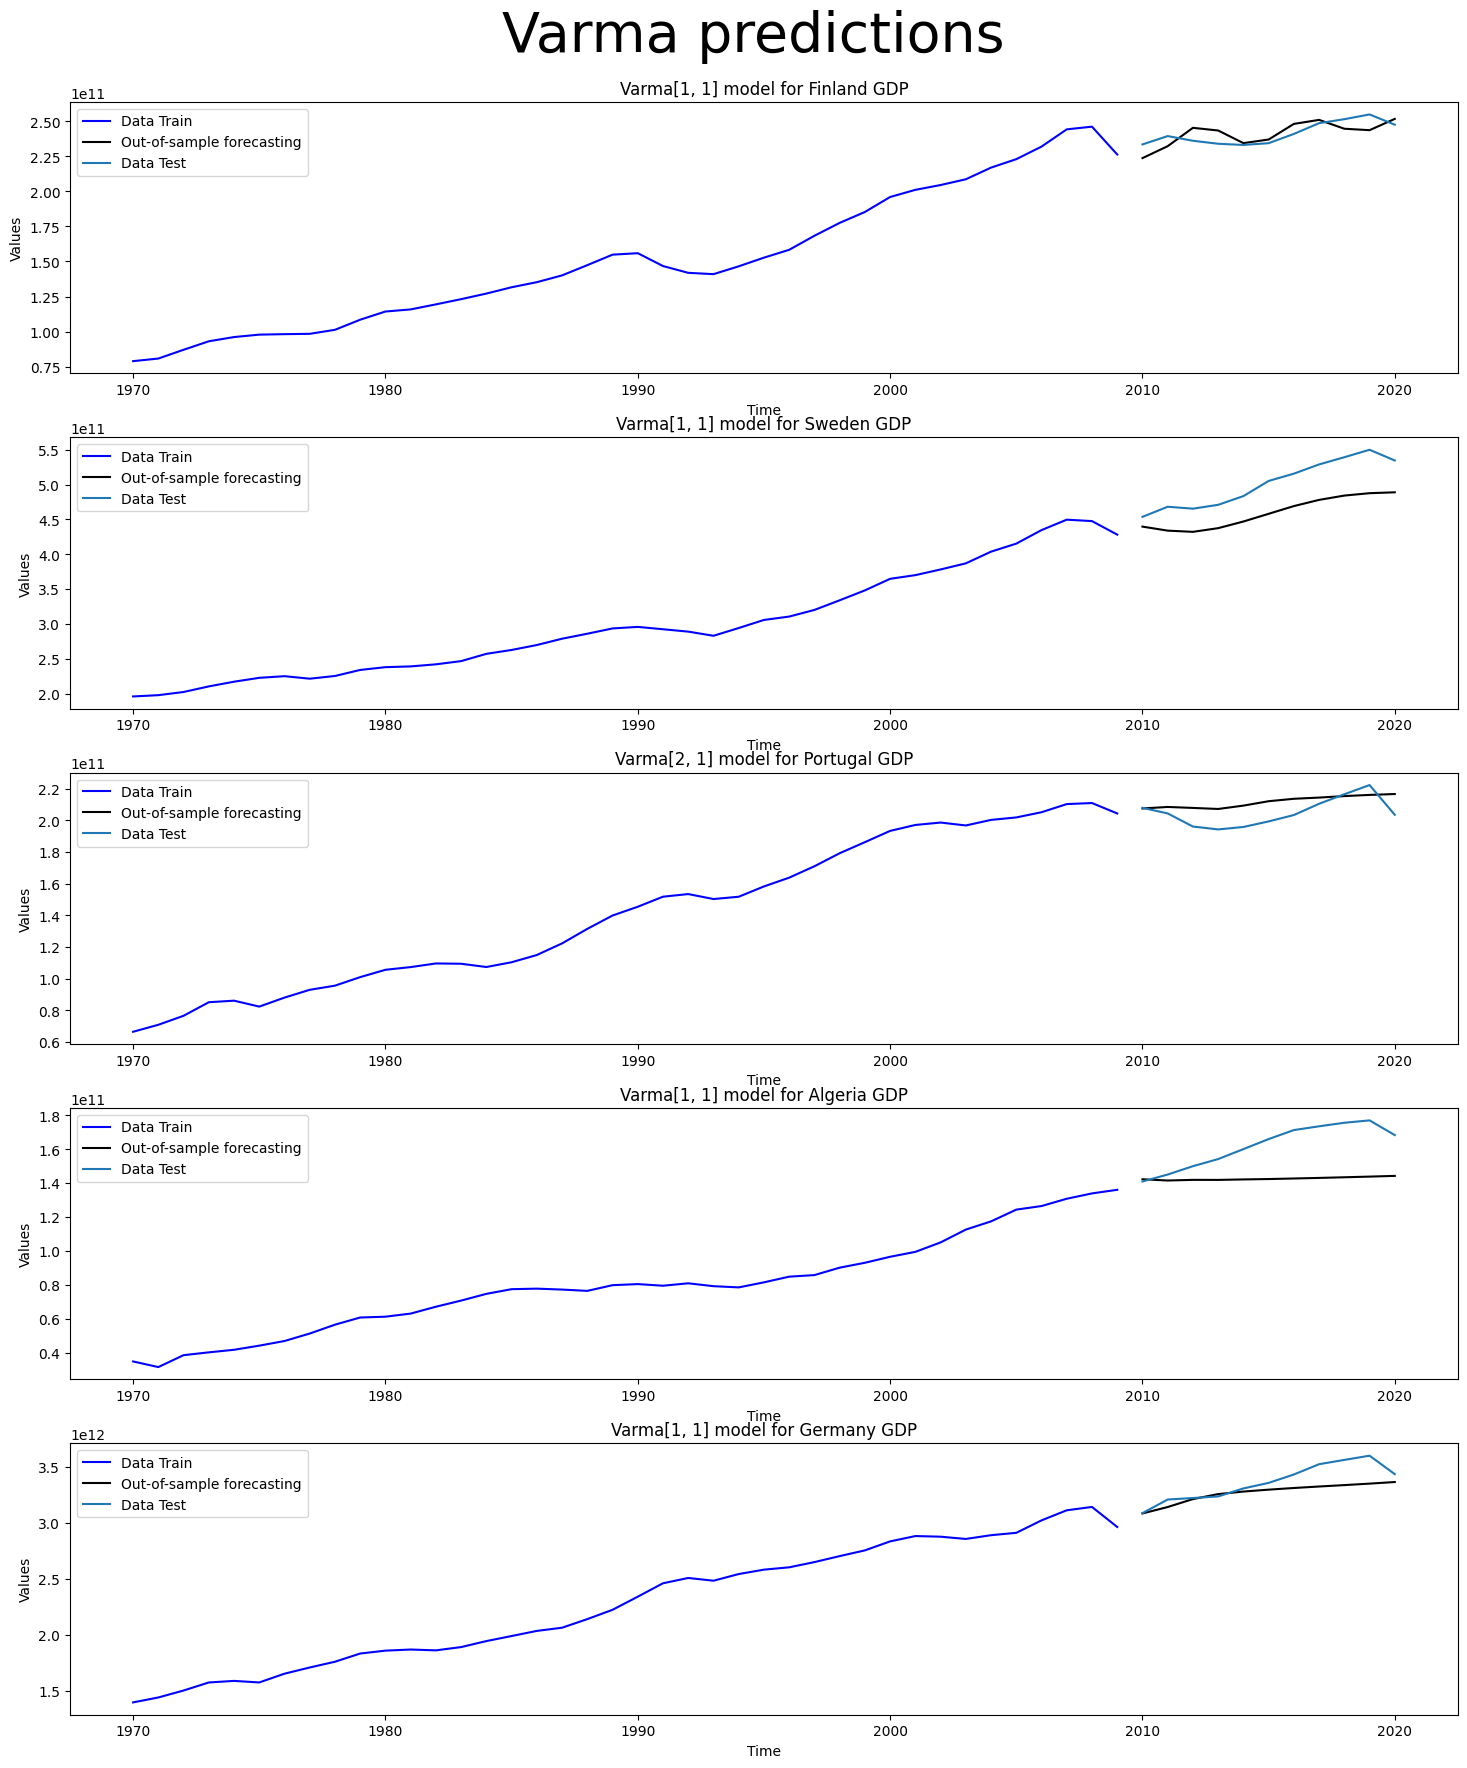

In [42]:
varmax_prediction_list = f.varma_prediction_plot(varmax_model_list, nation_list, varmax_order, df_train_test)

In [43]:
metrics_list_of_df = f.add_metrics('VARMA 2', varmax_model_list, metrics_list_of_df, df_train_test, nation_list, varmax_prediction_list)

for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-145.698941,9129753769.205559,11379151749.569609,0.03703
0,ETS,1956.542285,4117085592.005557,5307628891.079964,0.01704
0,VARMA 1,3544.975388,12716853389.725447,14345461801.068996,0.052126
0,VARMA 2,8871.880634,6481554012.802218,7245747162.198994,0.026841


Sweden


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-144.029068,40448606852.624504,46521924725.943939,0.078424
0,ETS,1942.438879,12494869883.661222,15361134317.354982,0.024486
0,VARMA 1,3664.48482,42731050558.961815,50314148439.786324,0.082217
0,VARMA 2,9084.199448,41698675515.289009,43555195406.42205,0.082004


Portugal


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-131.212962,9703147281.7558,12426903936.528591,0.046014
0,ETS,1913.305972,8843821833.598675,11146055131.349855,0.042069
0,VARMA 1,3481.397424,10571013539.219732,12522505691.467239,0.052819
0,VARMA 2,8802.286453,8187859907.754883,9531519416.619316,0.040734


Algeria


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-121.990519,16458341234.786371,17736584305.094528,0.099455
0,ETS,1870.375151,2985126765.921648,5715523647.835147,0.01786
0,VARMA 1,3568.587126,17459929028.964657,20245446322.356312,0.103502
0,VARMA 2,8753.990775,19542961206.120205,22478306188.739071,0.116007


Germany


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-154.46529,221597836767.304688,240551789171.569183,0.065097
0,ETS,2142.833062,51543010795.634499,82608490133.22438,0.015487
0,VARMA 1,3972.239645,351569567782.813416,372393020335.581482,0.10317
0,VARMA 2,9786.823403,95676056828.695938,128309849202.148453,0.027466


# Best model

In [44]:
def best_model(metrics_df, nation_list):
  for idx, df in enumerate(metrics_df):
    mask = df['AIC'] == df['AIC'].min()
    best_aic = df[mask]['Model_name'][0]
    mask = df['MAE'] == df['MAE'].min()
    best_mae = df[mask]['Model_name'][0]
    mask = df['RMSE'] == df['RMSE'].min()
    best_rmse = df[mask]['Model_name'][0]
    mask = df['MAPE'] == df['MAPE'].min()
    best_mape = df[mask]['Model_name'][0]
    best_dic = {'Best AIC' : best_aic,
                'Best MAE' : best_mae,
                'Best RMSE' : best_rmse,
                'Best MAPE' : best_mape}
    best_df = pd.DataFrame(best_dic, index = [nation_list[idx]])
    display(best_df)
    print('\n')

In [45]:
best_model(metrics_list_of_df, nation_list)

,Best AIC,Best MAE,Best RMSE,Best MAPE
Finland,ARIMAX,ETS,ETS,ETS


,Best AIC,Best MAE,Best RMSE,Best MAPE
Sweden,ARIMAX,ETS,ETS,ETS


,Best AIC,Best MAE,Best RMSE,Best MAPE
Portugal,ARIMAX,VARMA 2,VARMA 2,VARMA 2


,Best AIC,Best MAE,Best RMSE,Best MAPE
Algeria,ARIMAX,ETS,ETS,ETS


,Best AIC,Best MAE,Best RMSE,Best MAPE
Germany,ARIMAX,ETS,ETS,ETS


# TO-DO

- Check arima models, poor performance
- Add confidence intervals to predictions plot
- VAR
    - diagnostics
- funzioni documentation
- readme